(60000, 28, 28)
shape of data: (1000, 28, 28)
train data : (1000, 784)
train labels : (60000,)
weights : (784, 625)
Epoch Number 1
Epoch Number 2
Epoch Number 3
Epoch Number 4


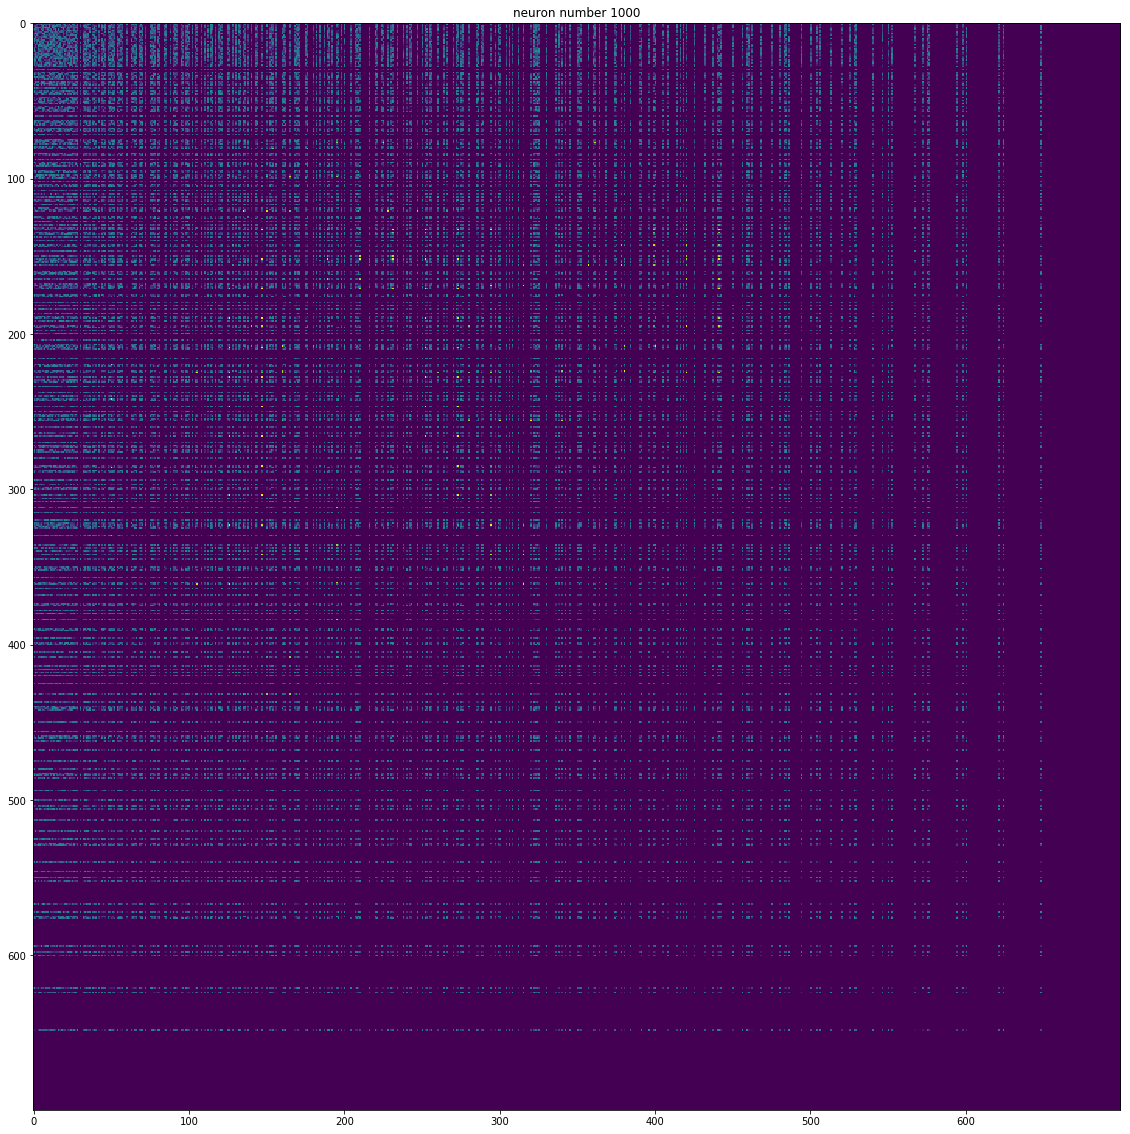

Epoch Number 5
Epoch Number 6
Epoch Number 7
Epoch Number 8
Epoch Number 9
Epoch Number 10
Epoch Number 11


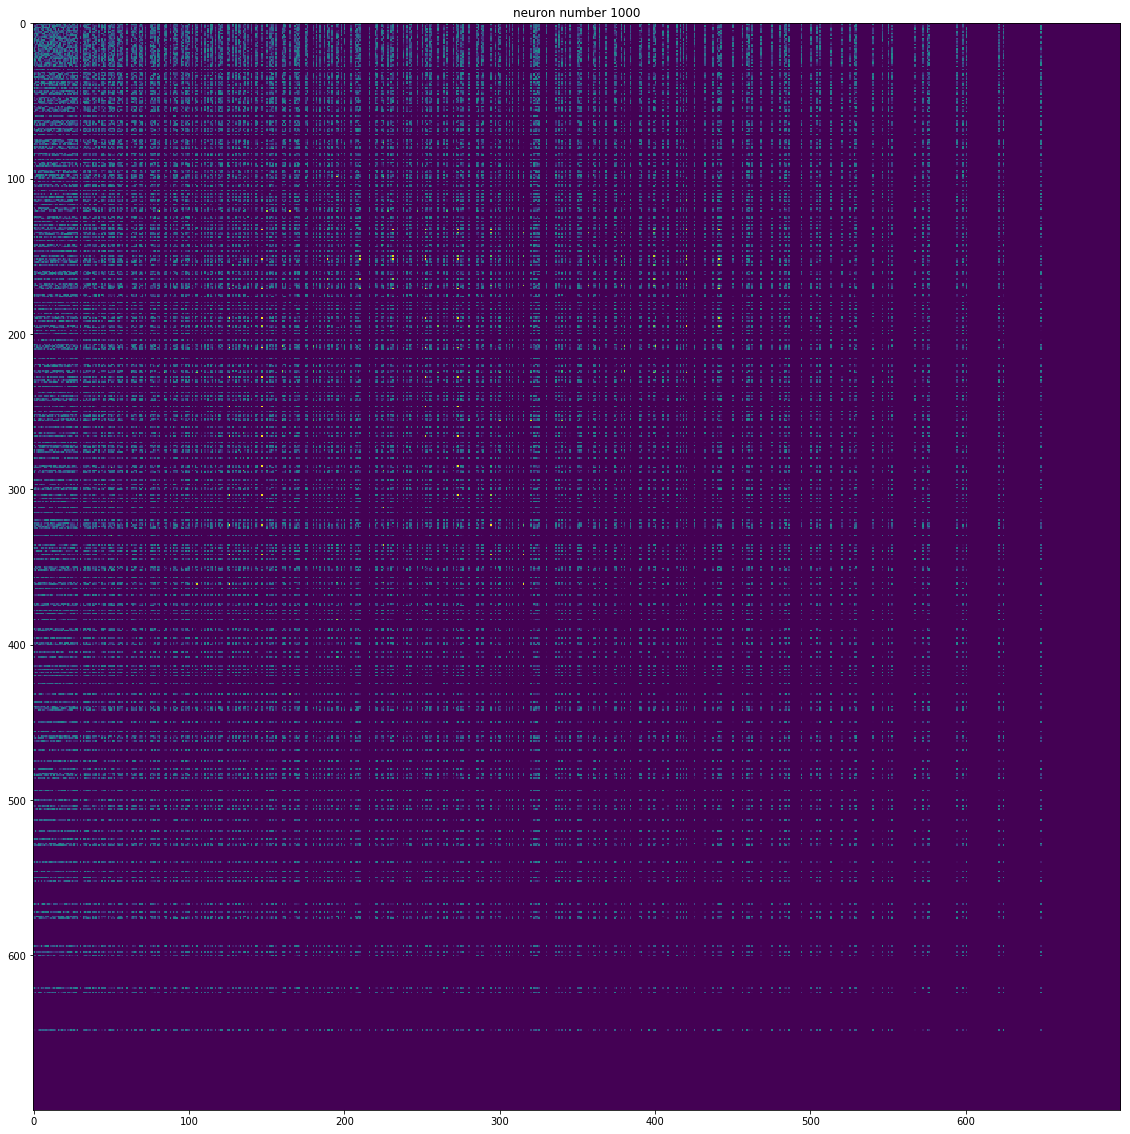

Epoch Number 12
Epoch Number 13
Epoch Number 14
Epoch Number 15
Epoch Number 16
Epoch Number 17
Epoch Number 18
Epoch Number 19


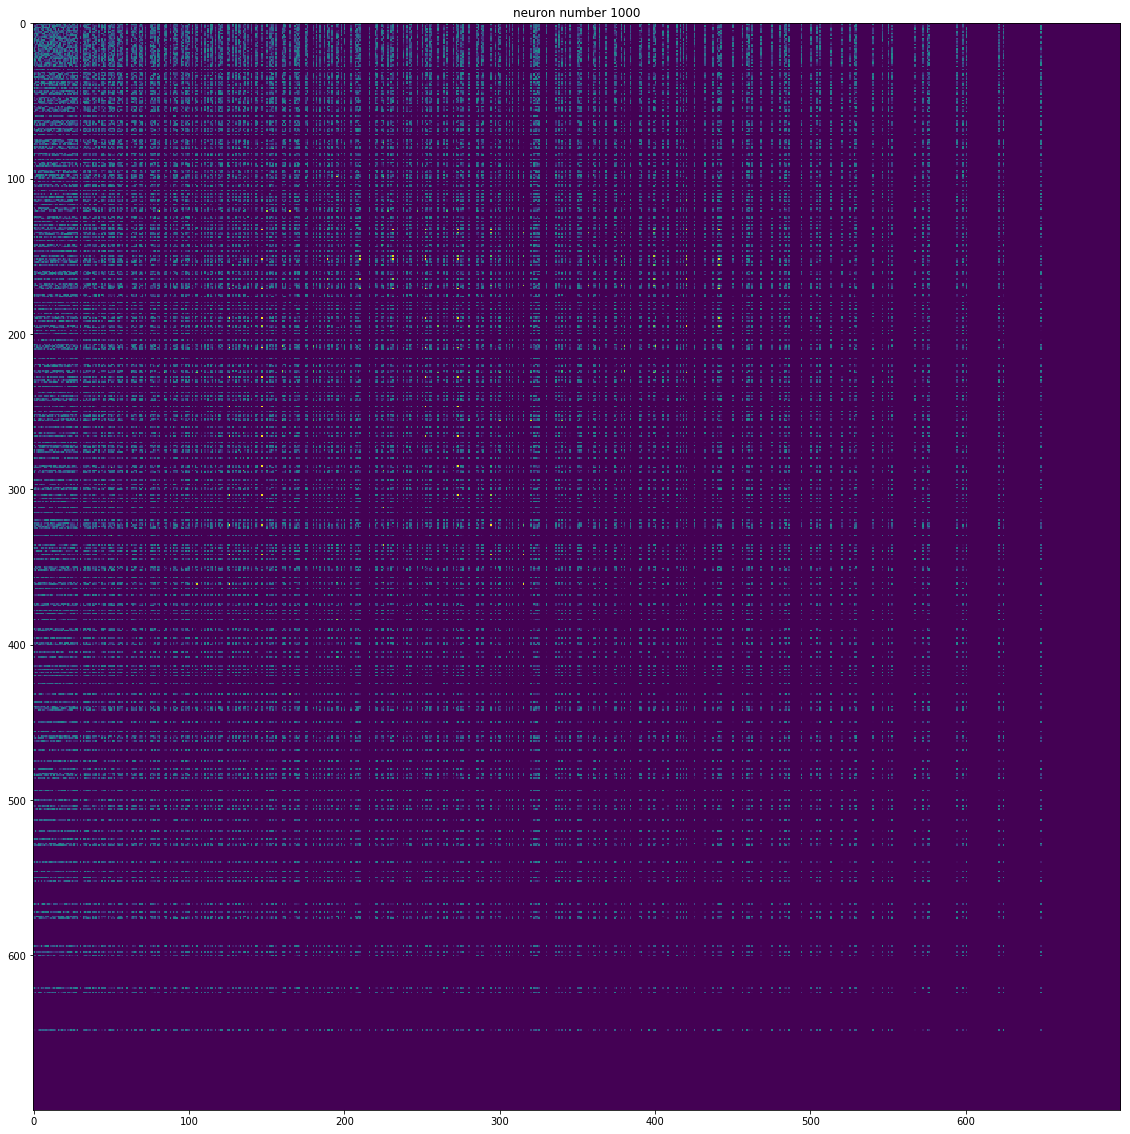

Epoch Number 20
Epoch Number 21
Epoch Number 22
Epoch Number 23
Epoch Number 24


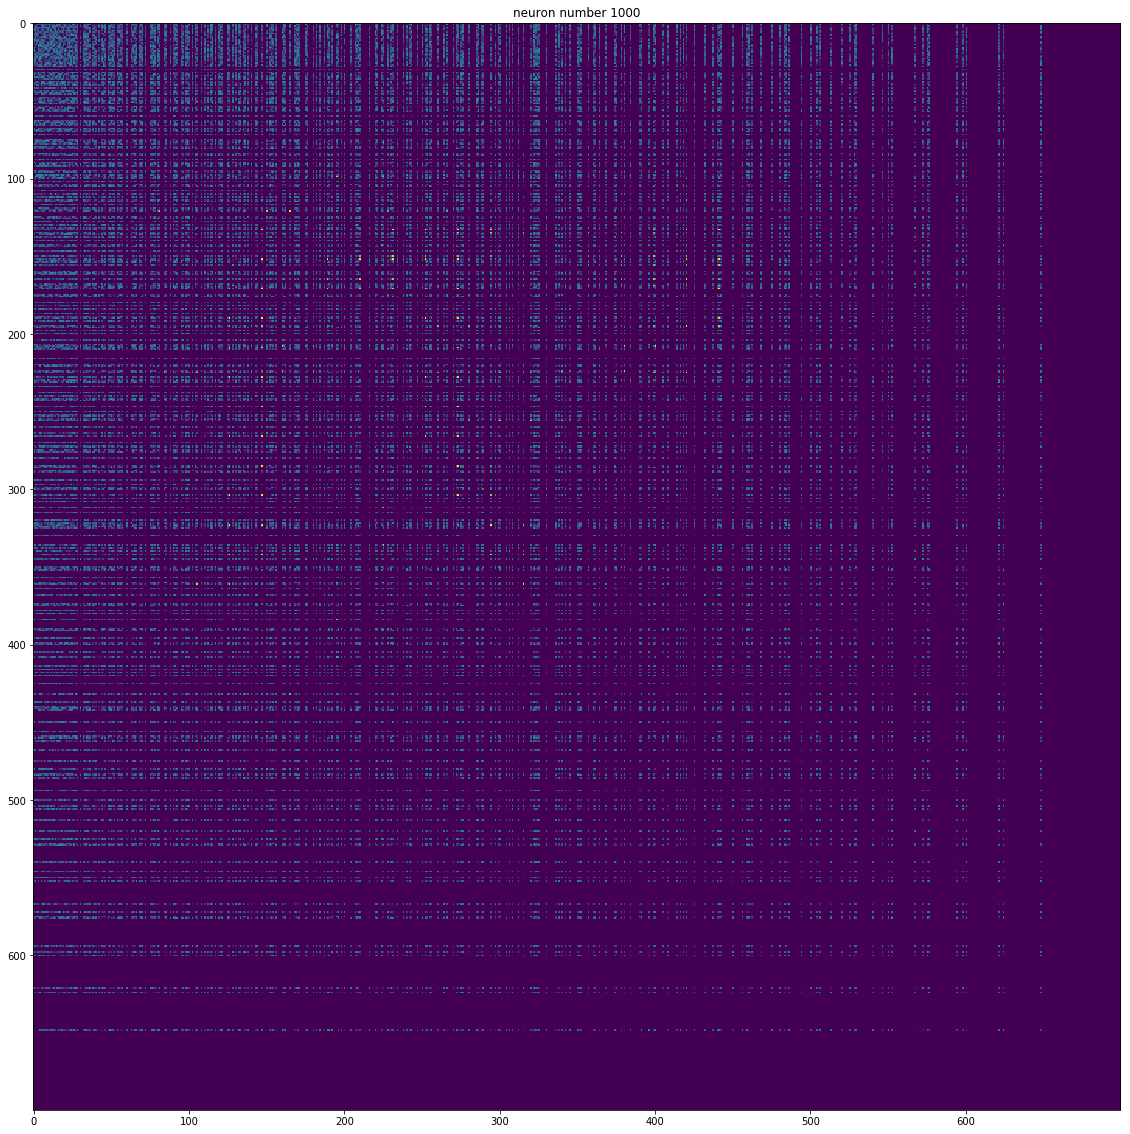

Epoch Number 25


In [ ]:
#R=0 with random initial weights
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import random 
# Loading Datasets and Initialization
alpha = 1
etha = 0.7

data_mnist = keras.datasets.mnist
(train_data_pre, train_labels), (test_data, test_labels) = data_mnist.load_data()
print(train_data_pre.shape)

# scale the values to 0.0 to 1.0
train_data_pre = train_data_pre / 255.0
test_data = test_data / 255.0
data = np.zeros((1000,28,28))
for i in range(1000):
    data_sample = random.choice(train_data_pre)
    for j in range(28):
        for f in range(28):
            data[i,j,f] = data_sample[j,f]
print("shape of data:", data.shape)

train_data = np.zeros([1000, 784])

for i in range(1000):
    train_data[i] = np.matrix.flatten(data[i])

weight = 0.5*np.random.rand(train_data.shape[1], 625).astype("float")
epoch = 1
epoch_number = 50
numerator = np.zeros((625, 1))

print(f'train data : {np.shape(train_data)}')
print(f'train labels : {np.shape(train_labels)}')
print(f'weights : { np.shape(weight)}')

# Training the Network
while True:
    print("Epoch Number %d"%epoch)
    weight_prev = np.copy(weight)
    for i in range (train_data.shape[0]):
        temp = np.sum((weight - train_data[i, :].reshape(784, 1))**2,
                        axis = 0)
        argument = np.argmin(temp)
        weight[:, argument] += alpha*(train_data[i, :].reshape(train_data[i, :].size, ) - weight[:, argument].reshape(weight.shape[0], ))
    epoch = epoch + 1
    alpha = alpha*etha
    if(epoch==5 or epoch==12 or epoch==20 or epoch==25 or epoch==30 or epoch== 35 or epoch==40 or epoch==50):
        f,a=plt.subplots(1,1)
        f.set_size_inches(50,20)
        shekl = np.zeros((700,700))
        for i1 in range(25):
            for j1 in range(25):
                for i2 in range(28):
                    for j2 in range(28):
                    
                        shekl[i1*i2,j1*j2]=weight[(28*j2)+i2,(25*i1)+j1]                        
        plt.imshow(shekl)
        plt.title(f'neuron number {i+1}')
        plt.show()
        #plt.figure()
        #plt.imshow(weight_a.reshape(700,700),cmap='gray',vmin=0,vmax=1)
        #plt.title(f'neuron number {i+1}')
        #plt.show()
    if (np.linalg.norm(weight_prev - weight) < 0.001):
        break
    if (epoch == epoch_number):
        break

# Finding the Wining Units and Plotting the Corresponding Weights
numerator2 = np.zeros((625, 10))
for i in range (train_data.shape[0]):
    temp = np.sum((weight - train_data[i, :].reshape(train_data[i, :].size, 1))**2,
                    axis = 0)
    argument = np.argmin(temp)
    numerator[argument] = numerator[argument] + 1
    numerator2[argument,train_labels[i]] = numerator2[argument,train_labels[i]] + 1
    # numerator2[argument, 0] = numerator2[argument, 0] + 1

arguments = np.argsort(numerator,
                        axis = 0)
numerator2_sorted = numerator2[np.reshape(arguments,(625,))]
numerator_sorted  = numerator[np.reshape(arguments,(625,))]
numerator2_sorted = np.flipud(numerator2_sorted)
numerator_sorted = np.flipud(numerator_sorted)
#for i in range(20):
#    plt.figure()
#    plt.subplot(28,28,1)
#    plt.imshow(weight[:, arguments[-1 - i]].reshape(28, 28))
#    plt.title(f'neuron number {i+1}')
#    plt.show()


# Creating a Table Containing the Number of Data Points in which each of the Wining Units have
#sorted_args = arguments[: : -1]
#lst = []
#lst.append("First")
#lst.append("Second")
#lst.append("Third")
#for i in range (20-3):
#    lst.append("%dth"%(i+4))
#table = pd.DataFrame(numerator[sorted_args[:20]].reshape(1, 20),
#             index = ["Number of Points"],
#             columns = lst)
#print(table)



In [2]:
from pandas import DataFrame
deff = numerator_sorted[0:20].reshape(20, 1)
df = DataFrame(deff, columns= ['Numbers'])
df.to_excel(r'out20.xlsx')

In [3]:
from pandas import DataFrame
df = DataFrame(numerator2_sorted, columns= ['1','2','3','4','5','6','7','8','9','10'])
df.to_excel(r'out.xlsx')

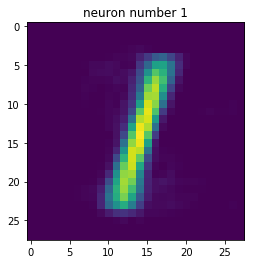

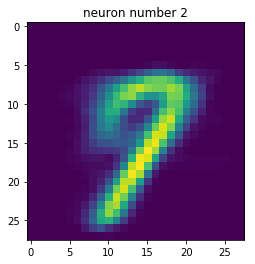

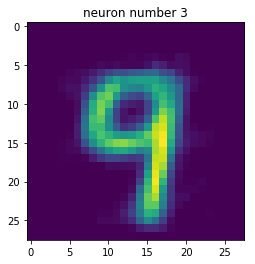

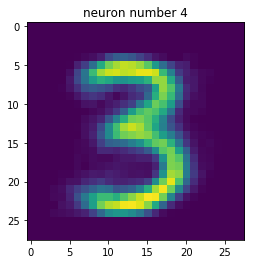

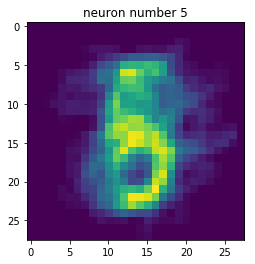

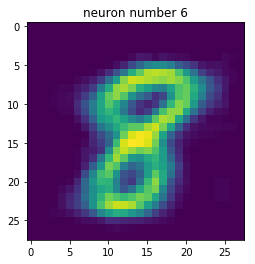

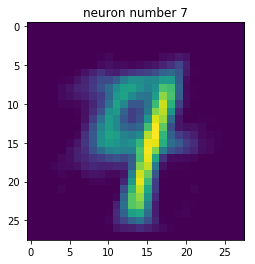

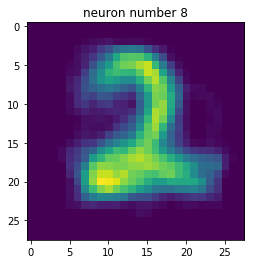

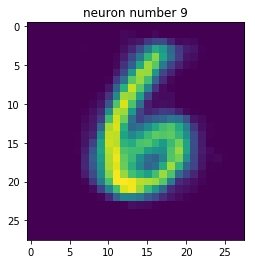

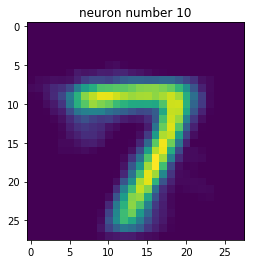

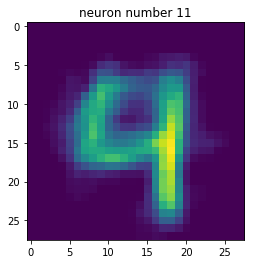

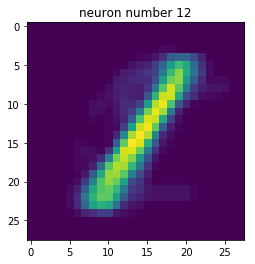

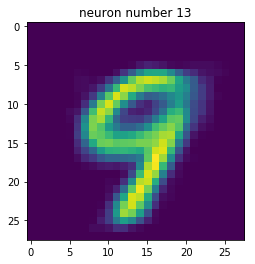

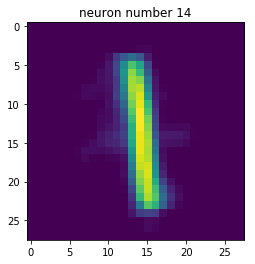

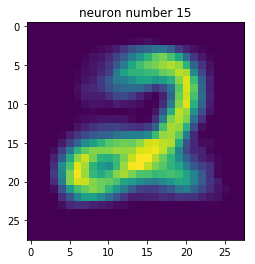

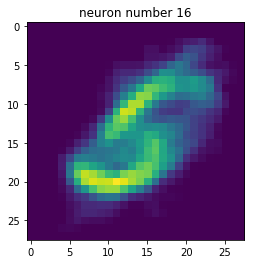

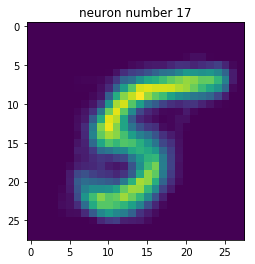

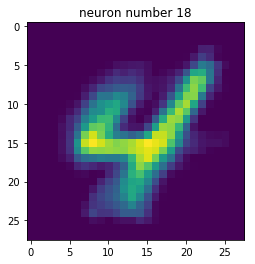

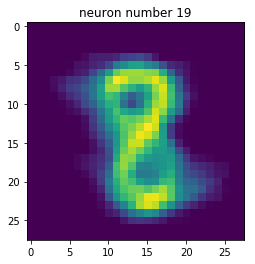

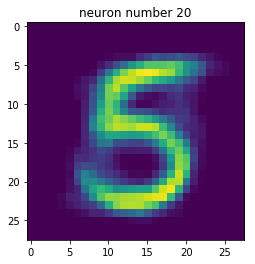

In [4]:
for i in range(20):
    plt.figure()
    plt.imshow(weight[:, arguments[-1 - i]].reshape(28, 28))
    plt.title(f'neuron number {i+1}')
    plt.show()

(60000, 28, 28)
shape of data: (1000, 28, 28)
shape of data: (1000, 28, 28)
train data : (1000, 784)
train labels : (60000,)
weights : (784, 625)
Epoch Number 1
Epoch Number 2
Epoch Number 3
Epoch Number 4


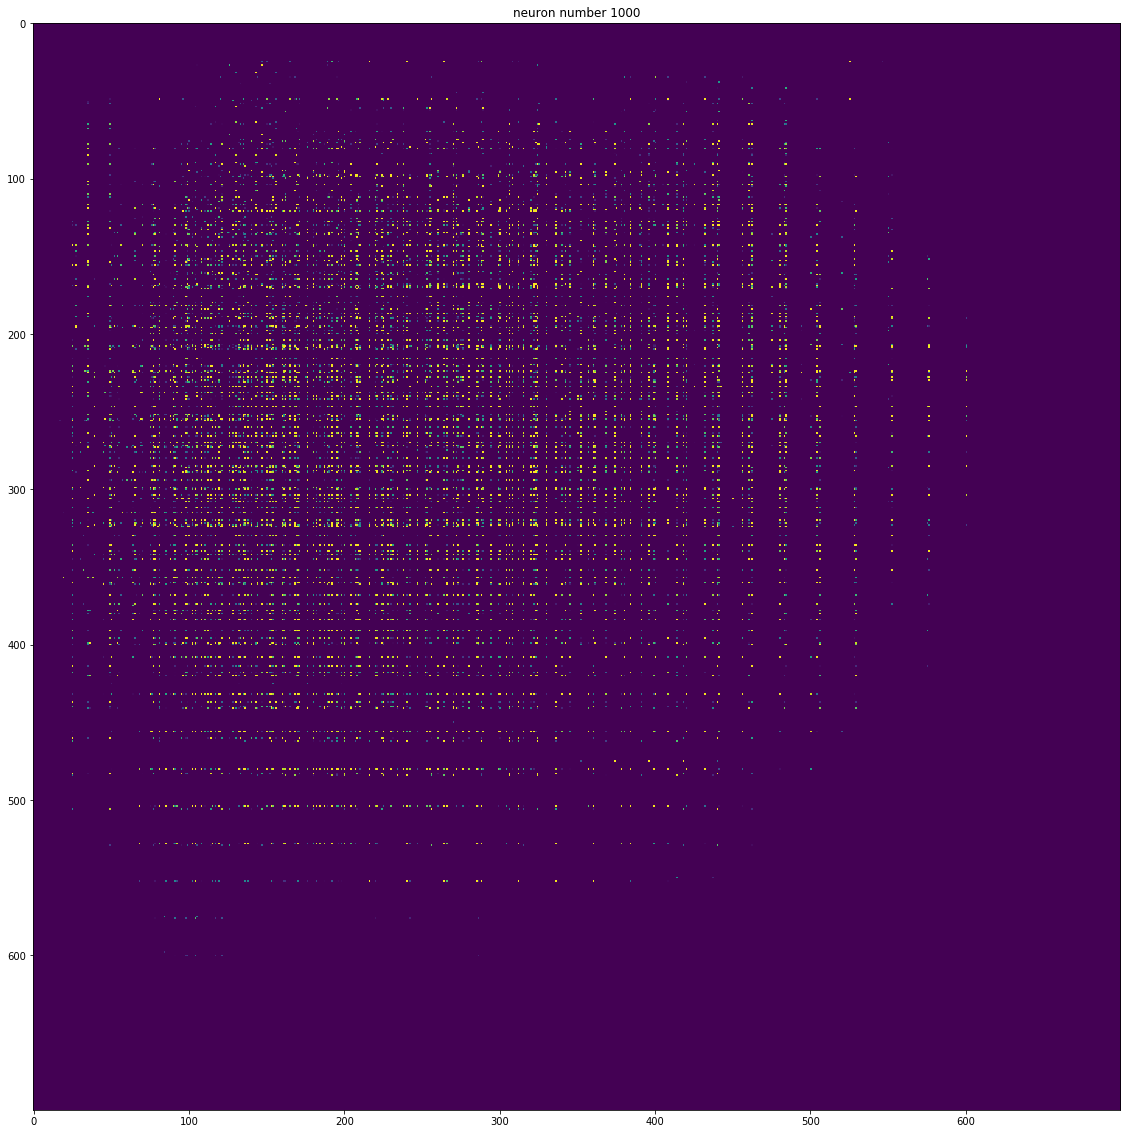

Epoch Number 5
Epoch Number 6
Epoch Number 7
Epoch Number 8
Epoch Number 9
Epoch Number 10
Epoch Number 11


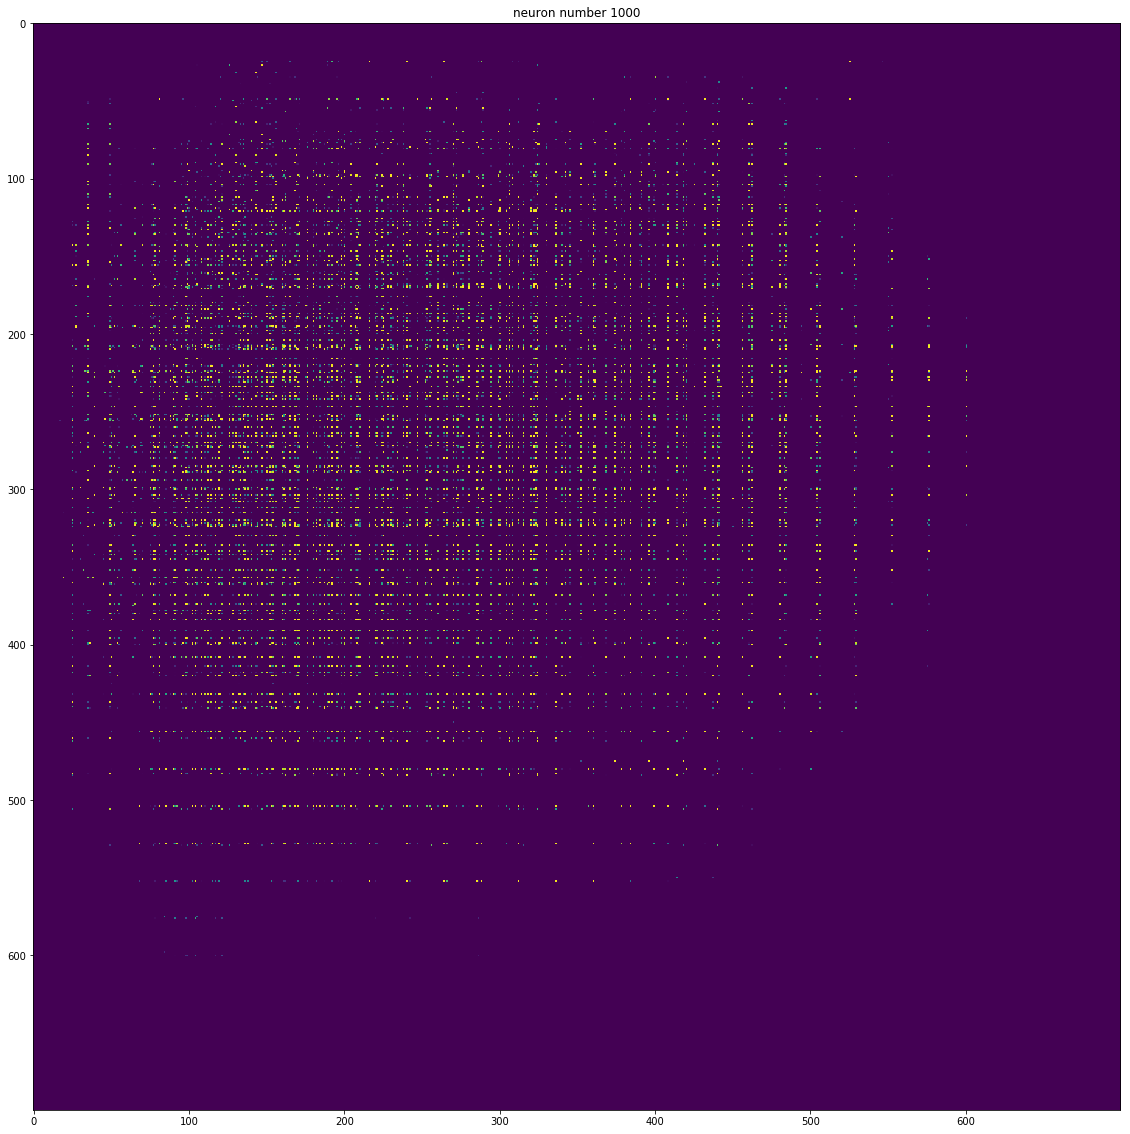

Epoch Number 12
Epoch Number 13
Epoch Number 14
Epoch Number 15
Epoch Number 16
Epoch Number 17
Epoch Number 18
Epoch Number 19


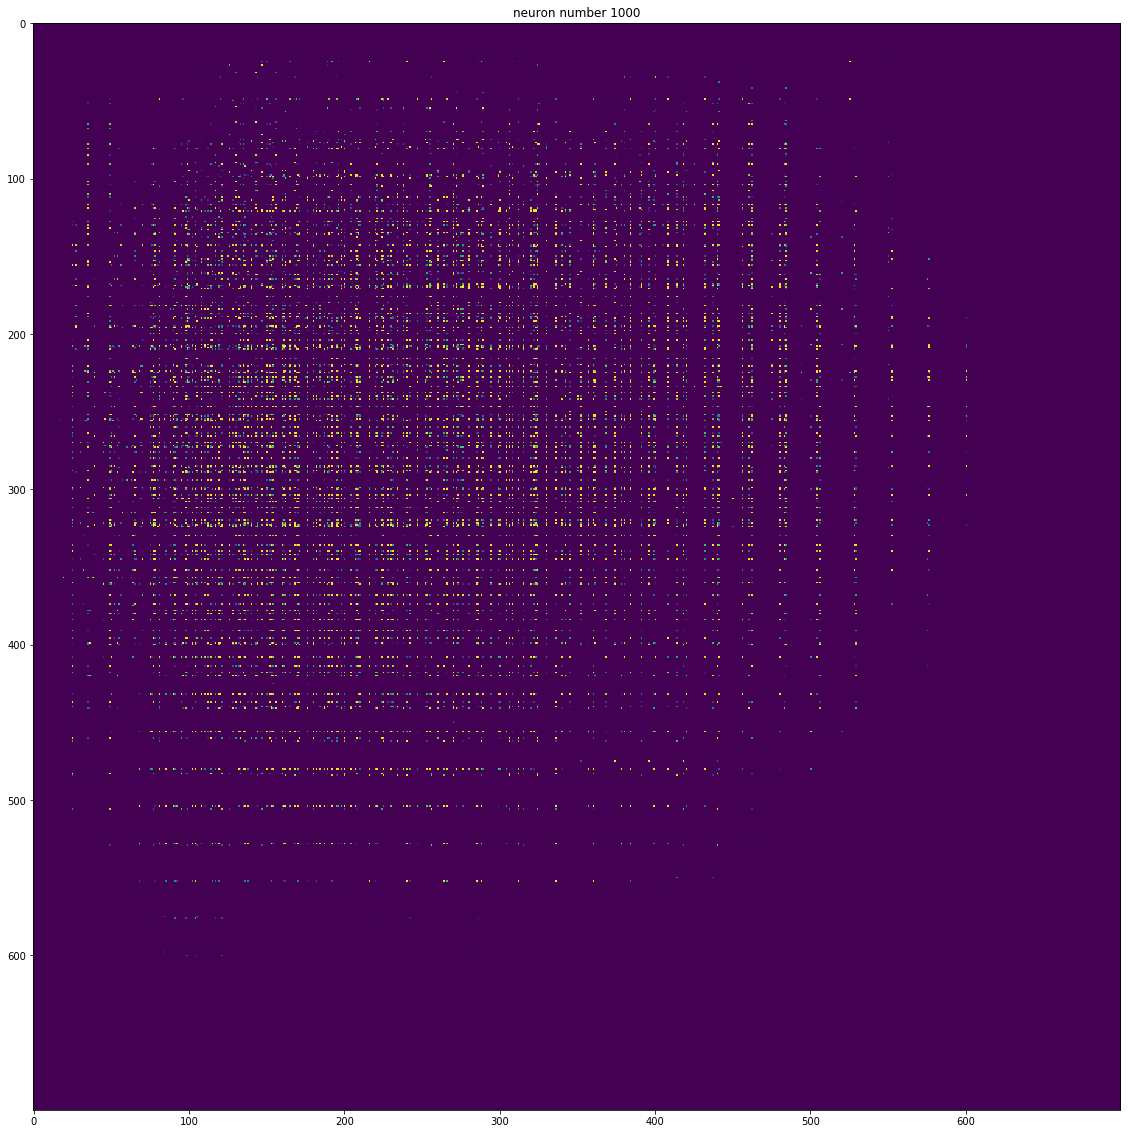

Epoch Number 20
Epoch Number 21
Epoch Number 22
Epoch Number 23
Epoch Number 24


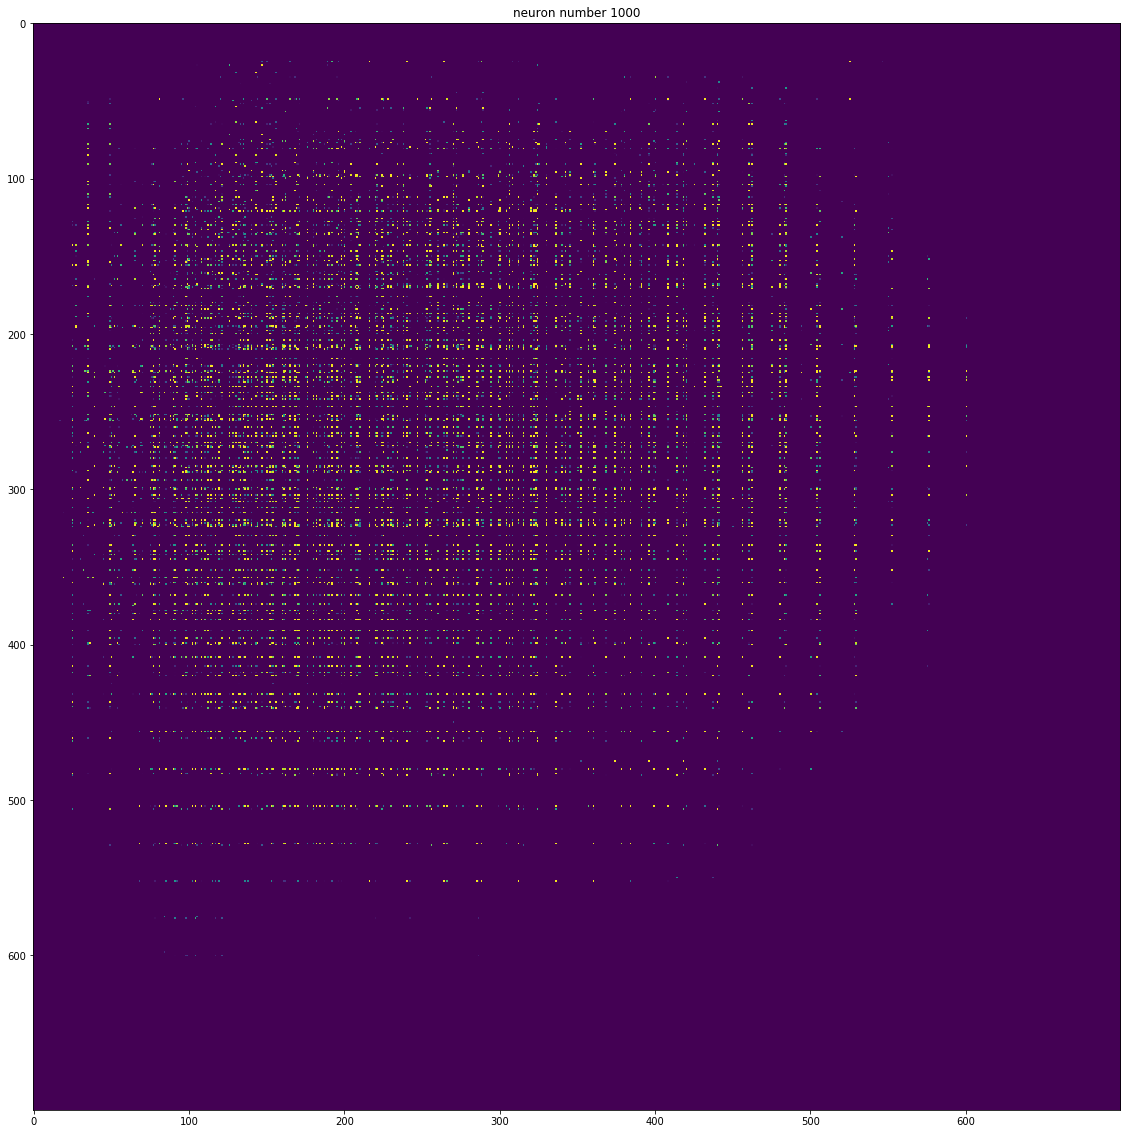

Epoch Number 25
Epoch Number 26
Epoch Number 27
Epoch Number 28


In [4]:
#R=0 with deterministics initial weights
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras

# Loading Datasets and Initialization
alpha = 1
etha = 0.7

data_mnist = keras.datasets.mnist
(train_data_pre, train_labels), (test_data, test_labels) = data_mnist.load_data()
print(train_data_pre.shape)

# scale the values to 0.0 to 1.0
train_data_pre = train_data_pre / 255.0
test_data = test_data / 255.0

data = np.zeros((1000,28,28))
for i in range(1000):
    data_sample = random.choice(train_data_pre)
    for j in range(28):
        for f in range(28):
            data[i,j,f] = data_sample[j,f]
print("shape of data:", data.shape)

train_data = np.zeros([1000, 784])

for i in range(1000):
    train_data[i] = np.matrix.flatten(data[i])

#weight = 0.5*np.random.rand(train_data.shape[1], 625).astype("float")
weight = np.zeros((625,784))
for i in range(625):
    data_sample = random.choice(train_data_pre)
    weight[i]=data_sample.reshape(784)
weight = weight.T
epoch = 1
epoch_number = 50
numerator = np.zeros((625, 1))
print(f'train data : {np.shape(train_data)}')
print(f'train labels : {np.shape(train_labels)}')
print(f'weights : { np.shape(weight)}')

# Training the Network
while True:
    print("Epoch Number %d"%epoch)
    weight_prev = np.copy(weight)
    for i in range (train_data.shape[0]):
        temp = np.sum((weight - train_data[i, :].reshape(784, 1))**2,
                        axis = 0)
        argument = np.argmin(temp)
        weight[:, argument] += alpha*(train_data[i, :].reshape(train_data[i, :].size, ) - weight[:, argument].reshape(weight.shape[0], ))
    epoch = epoch + 1
    alpha = alpha*etha
    if(epoch==5 or epoch==12 or epoch==20 or epoch==25 or epoch==30 or epoch== 35 or epoch==40 or epoch==50):
        f,a=plt.subplots(1,1)
        f.set_size_inches(50,20)
        #plt.figure()
        shekl = np.zeros((700,700))
        for i1 in range(25):
            for j1 in range(25):
                for i2 in range(28):
                    for j2 in range(28):
                        shekl[i1*i2,j1*j2]=weight[(28*j2)+i2,(25*i1)+j1]
        plt.imshow(shekl)
        plt.title(f'neuron number {i+1}')
        plt.show()
    if (np.linalg.norm(weight_prev - weight) < 0.001):
        break
    if (epoch == epoch_number):
        break

# Finding the Wining Units and Plotting the Corresponding Weights
numerator2 = np.zeros((625, 10))
for i in range (train_data.shape[0]):
    temp = np.sum((weight - train_data[i, :].reshape(train_data[i, :].size, 1))**2,
                    axis = 0)
    argument = np.argmin(temp)
    numerator[argument] = numerator[argument] + 1
    numerator2[argument,train_labels[i]] = numerator2[argument,train_labels[i]] + 1

arguments = np.argsort(numerator,
                        axis = 0)
numerator2_sorted = numerator2[np.reshape(arguments,(625,))]
numerator_sorted  = numerator[np.reshape(arguments,(625,))]
numerator2_sorted = np.flipud(numerator2_sorted)
numerator_sorted = np.flipud(numerator_sorted)

In [5]:
from pandas import DataFrame
deff = numerator_sorted[0:20].reshape(20, 1)
df = DataFrame(deff, columns= ['Numbers'])
df.to_excel(r'out20.xlsx')

In [6]:
from pandas import DataFrame
df = DataFrame(numerator2_sorted, columns= ['1','2','3','4','5','6','7','8','9','10'])
df.to_excel(r'out.xlsx')

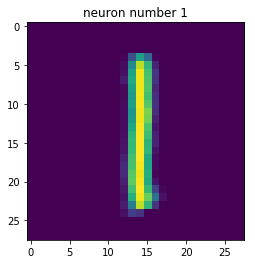

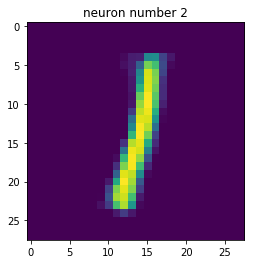

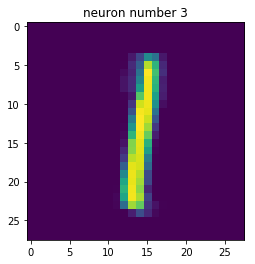

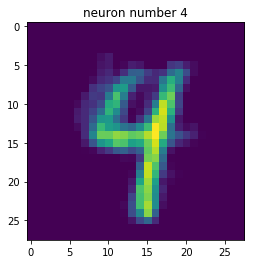

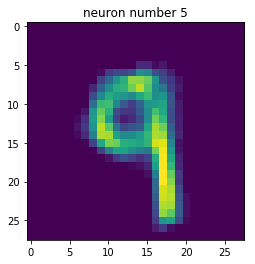

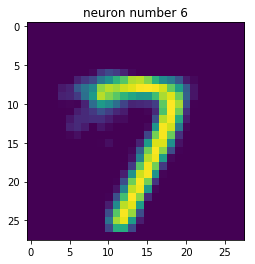

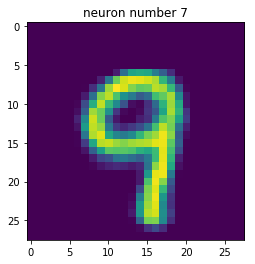

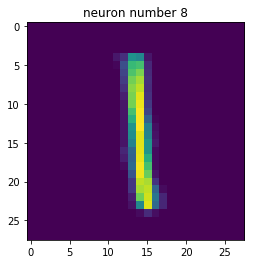

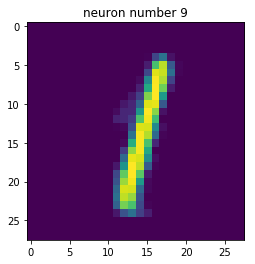

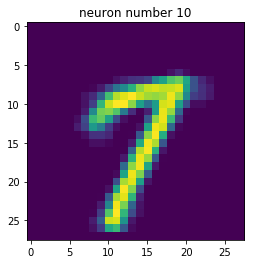

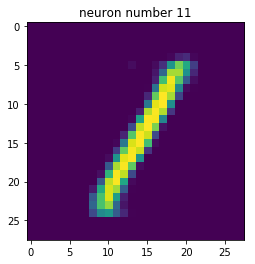

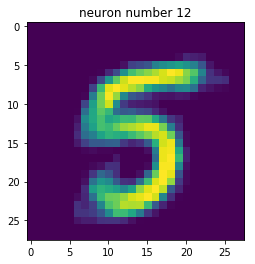

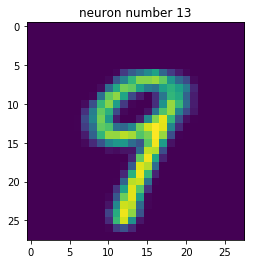

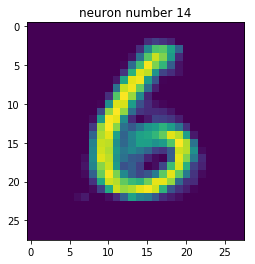

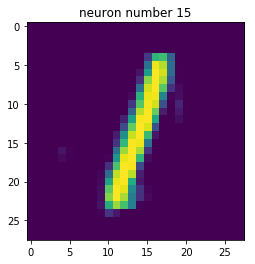

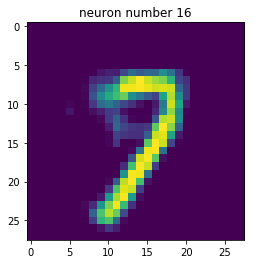

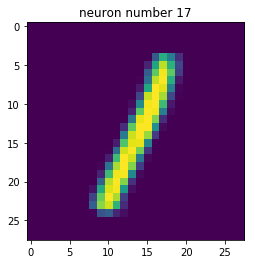

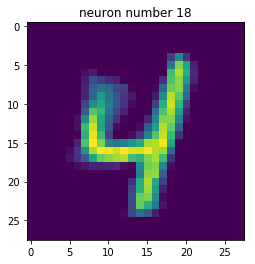

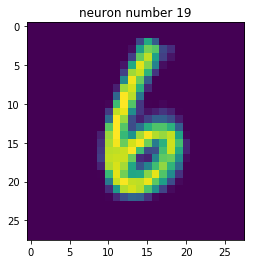

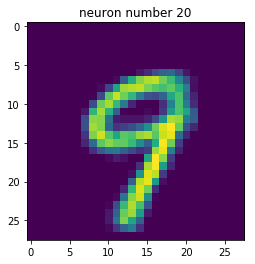

In [7]:
for i in range(20):
    plt.figure()
    plt.imshow(weight[:, arguments[-1 - i]].reshape(28, 28))
    plt.title(f'neuron number {i+1}')
    plt.show()

(60000, 28, 28)
shape of data: (1000, 28, 28)
train data : (1000, 784)
train labels : (60000,)
weights : (784, 625)
Epoch Number 1
Epoch Number 2
Epoch Number 3
Epoch Number 4


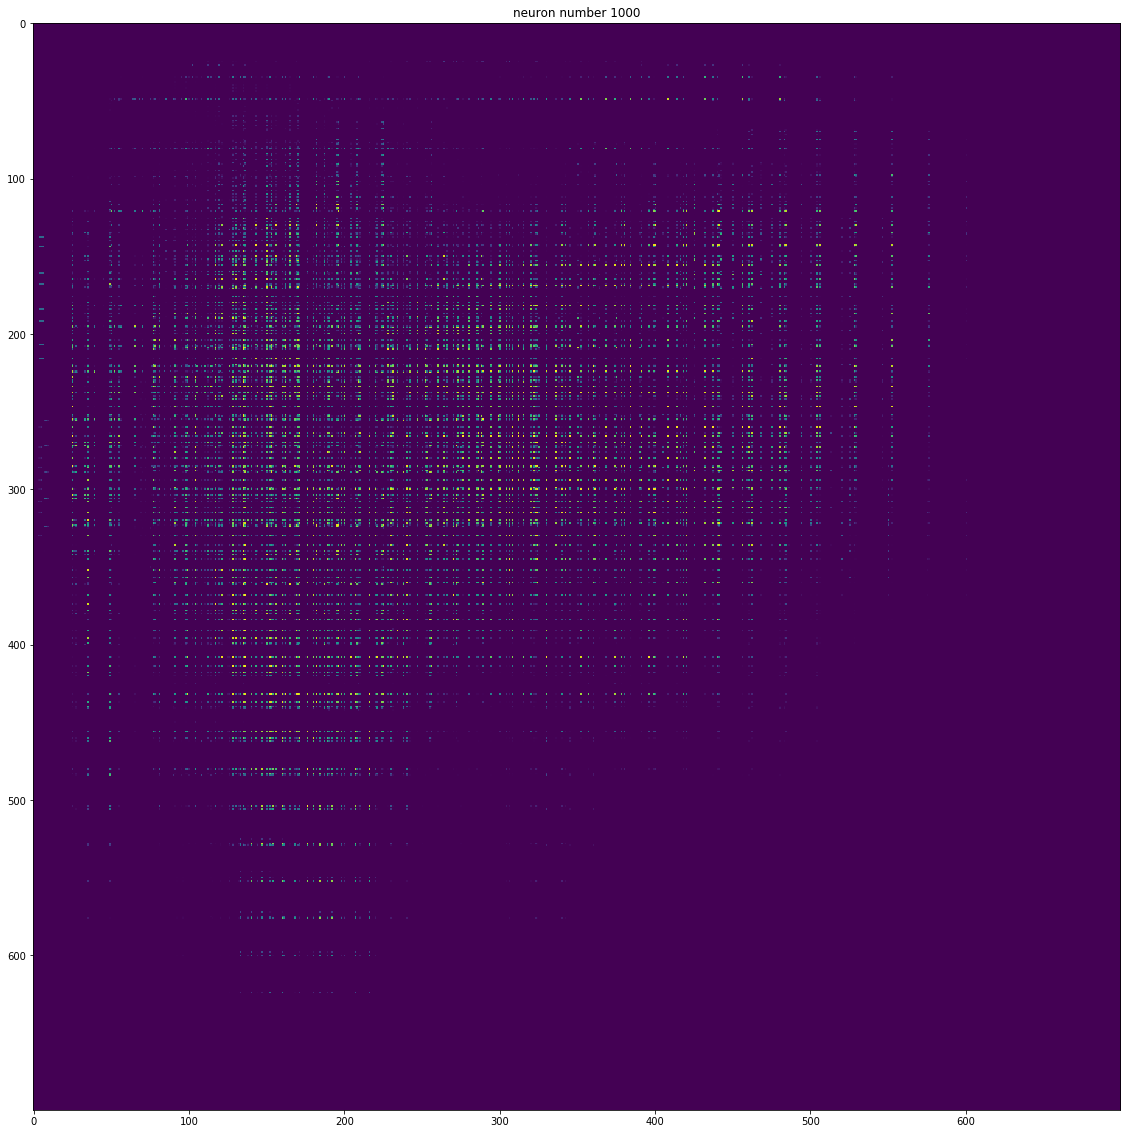

Epoch Number 5
Epoch Number 6
Epoch Number 7
Epoch Number 8
Epoch Number 9
Epoch Number 10
Epoch Number 11


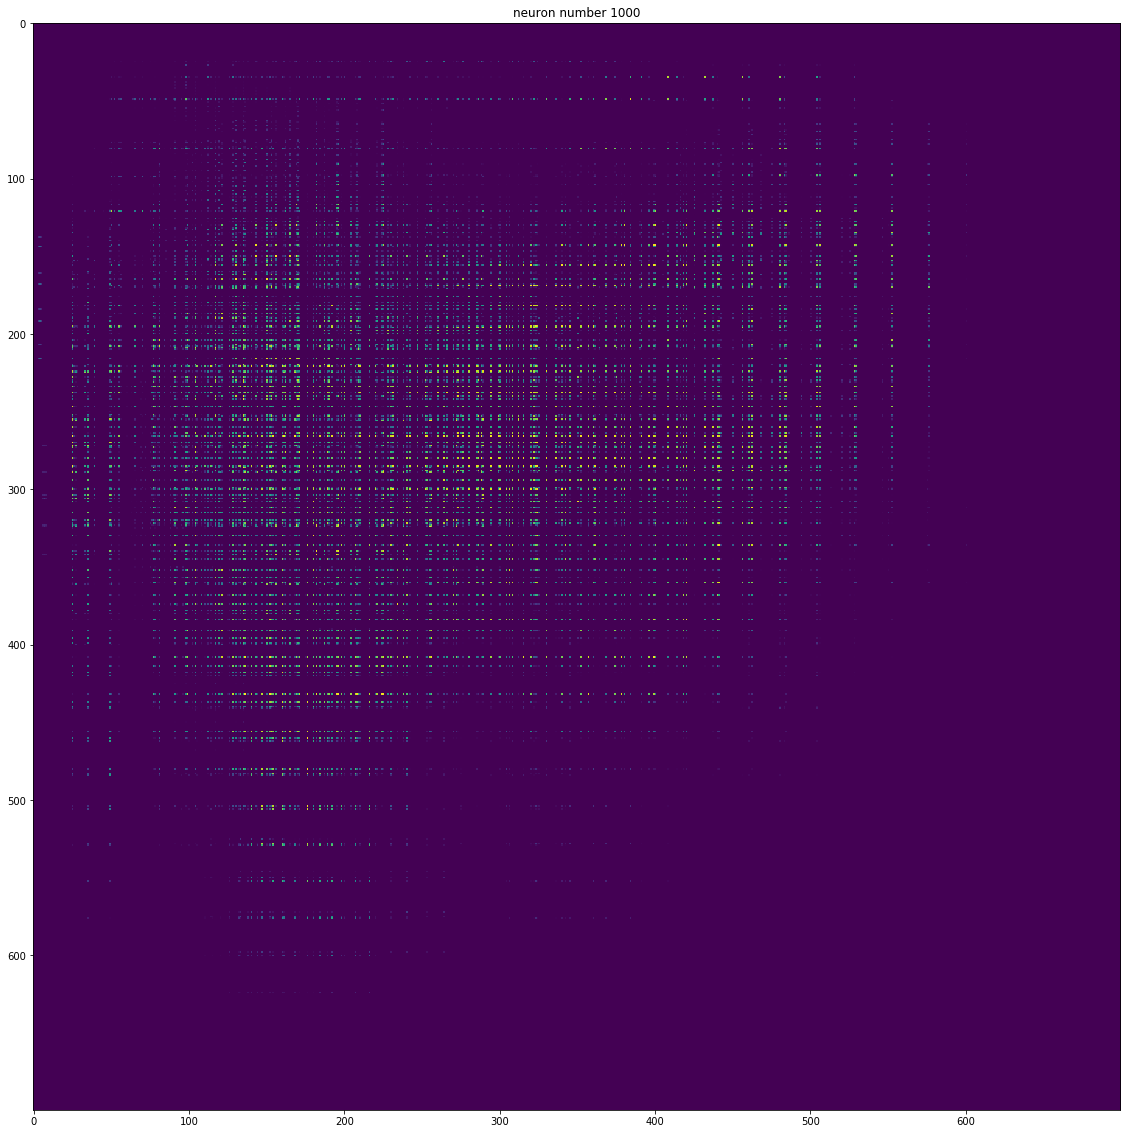

Epoch Number 12
Epoch Number 13
Epoch Number 14
Epoch Number 15
Epoch Number 16
Epoch Number 17
Epoch Number 18
Epoch Number 19


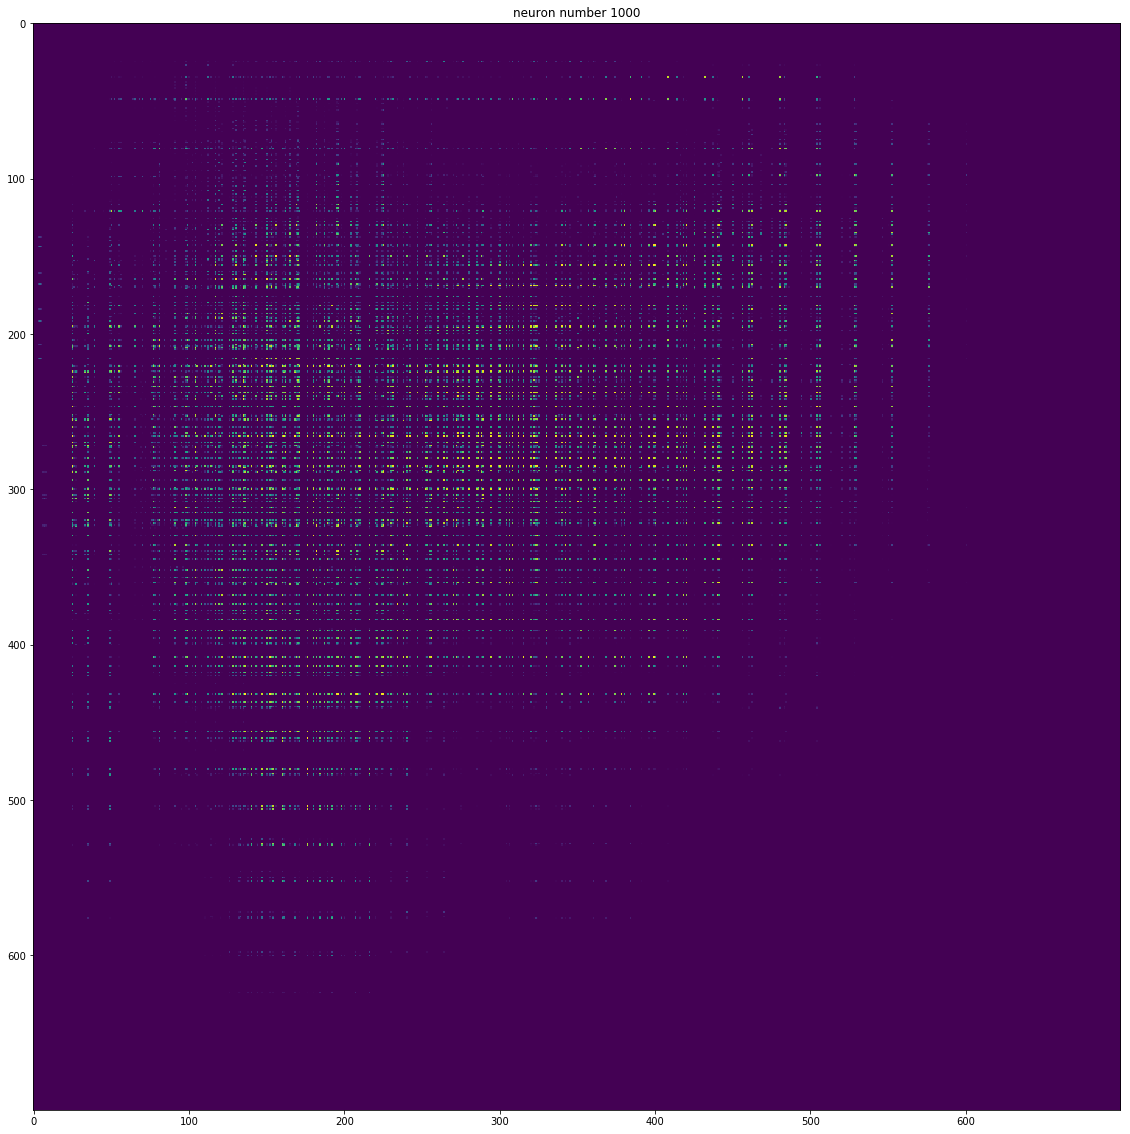

Epoch Number 20
Epoch Number 21
Epoch Number 22
Epoch Number 23
Epoch Number 24


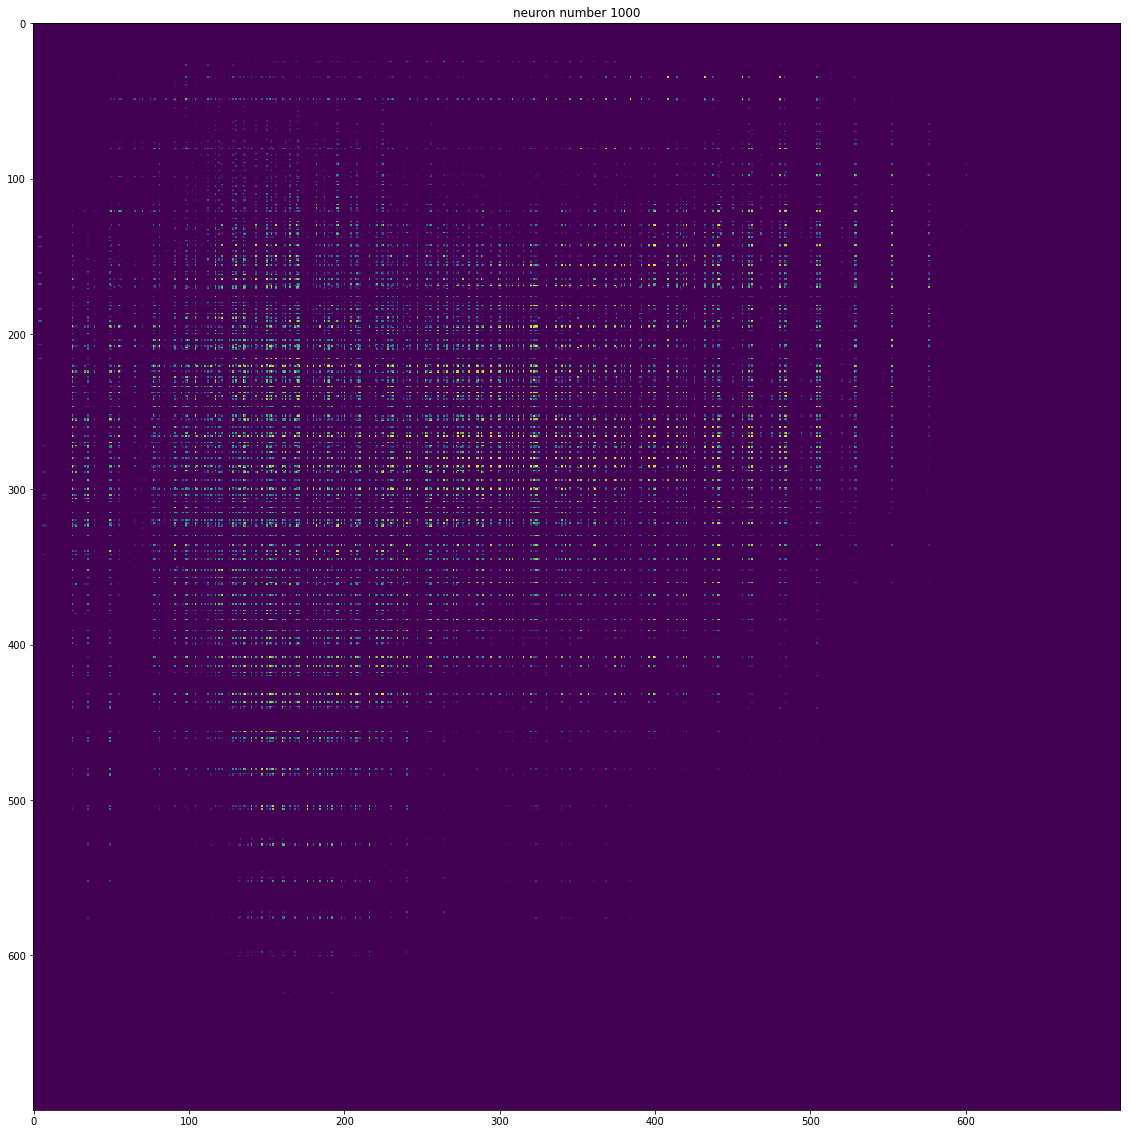

Epoch Number 25
Epoch Number 26
Epoch Number 27
Epoch Number 28
Epoch Number 29


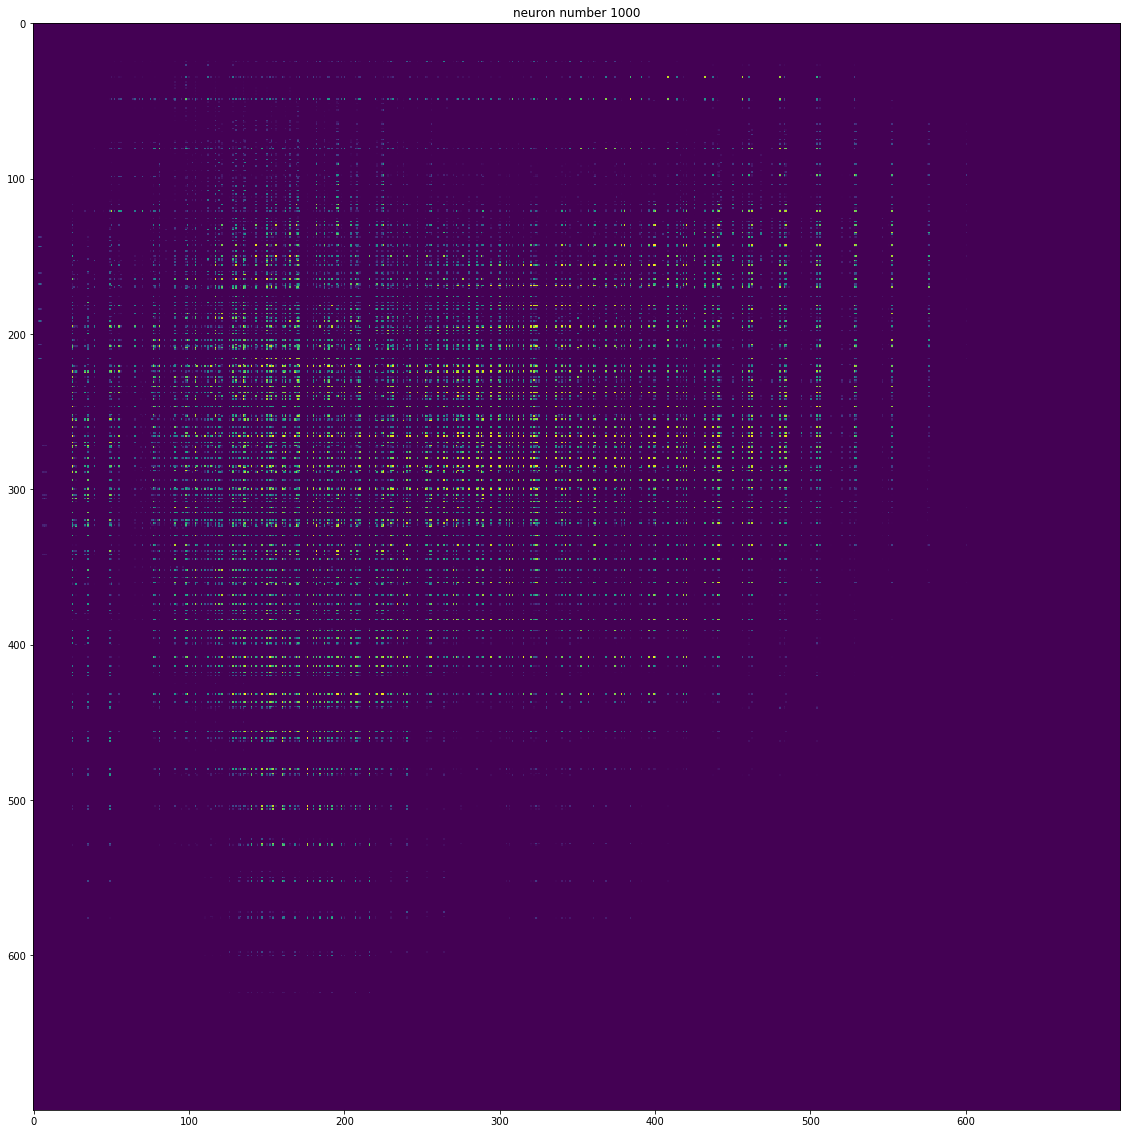

Epoch Number 30
Epoch Number 31
Epoch Number 32
Epoch Number 33
Epoch Number 34


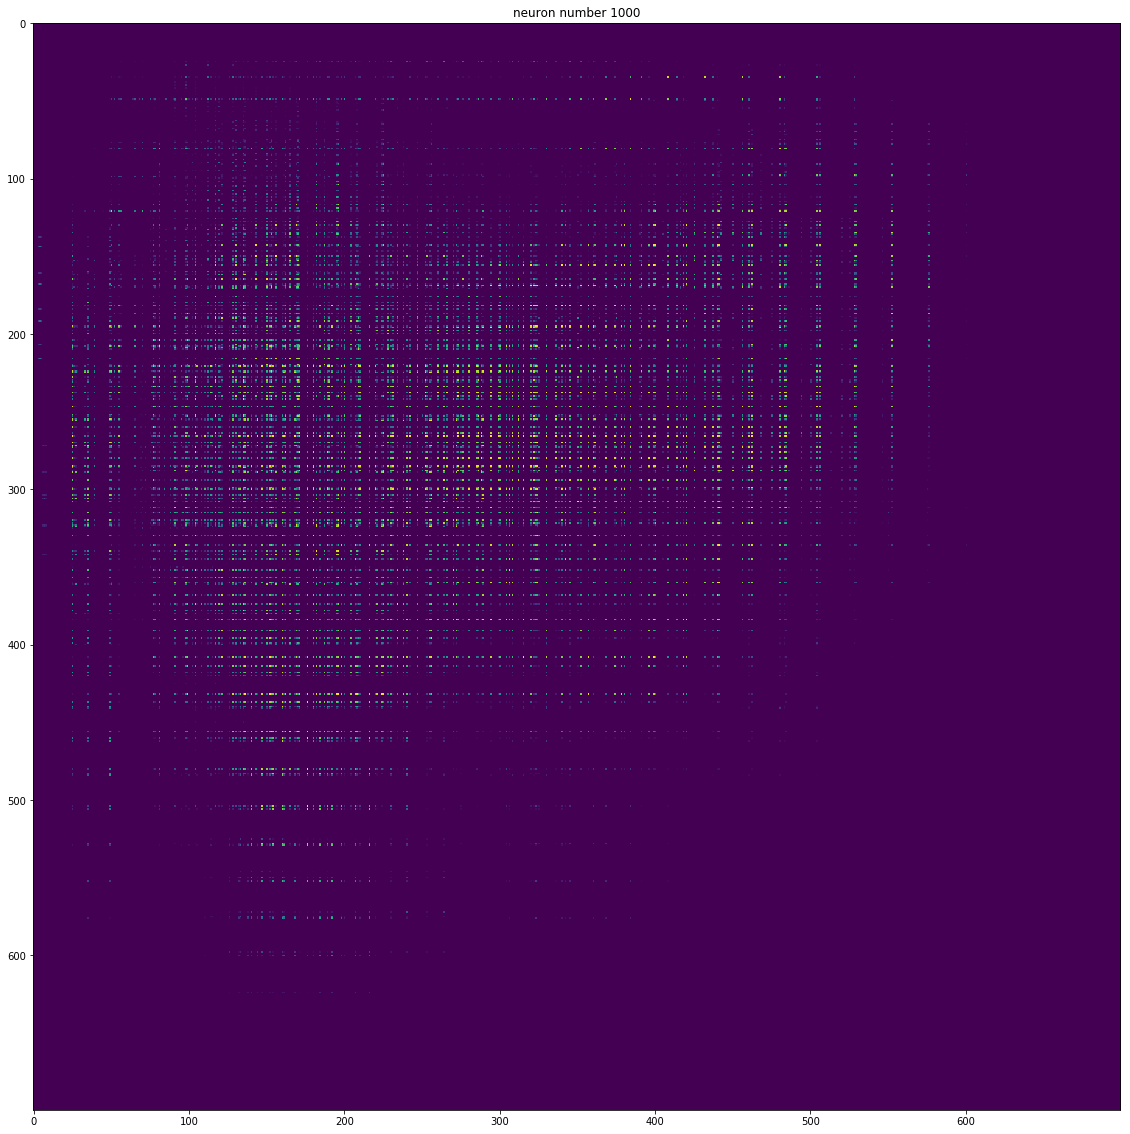

Epoch Number 35
Epoch Number 36
Epoch Number 37
Epoch Number 38
Epoch Number 39


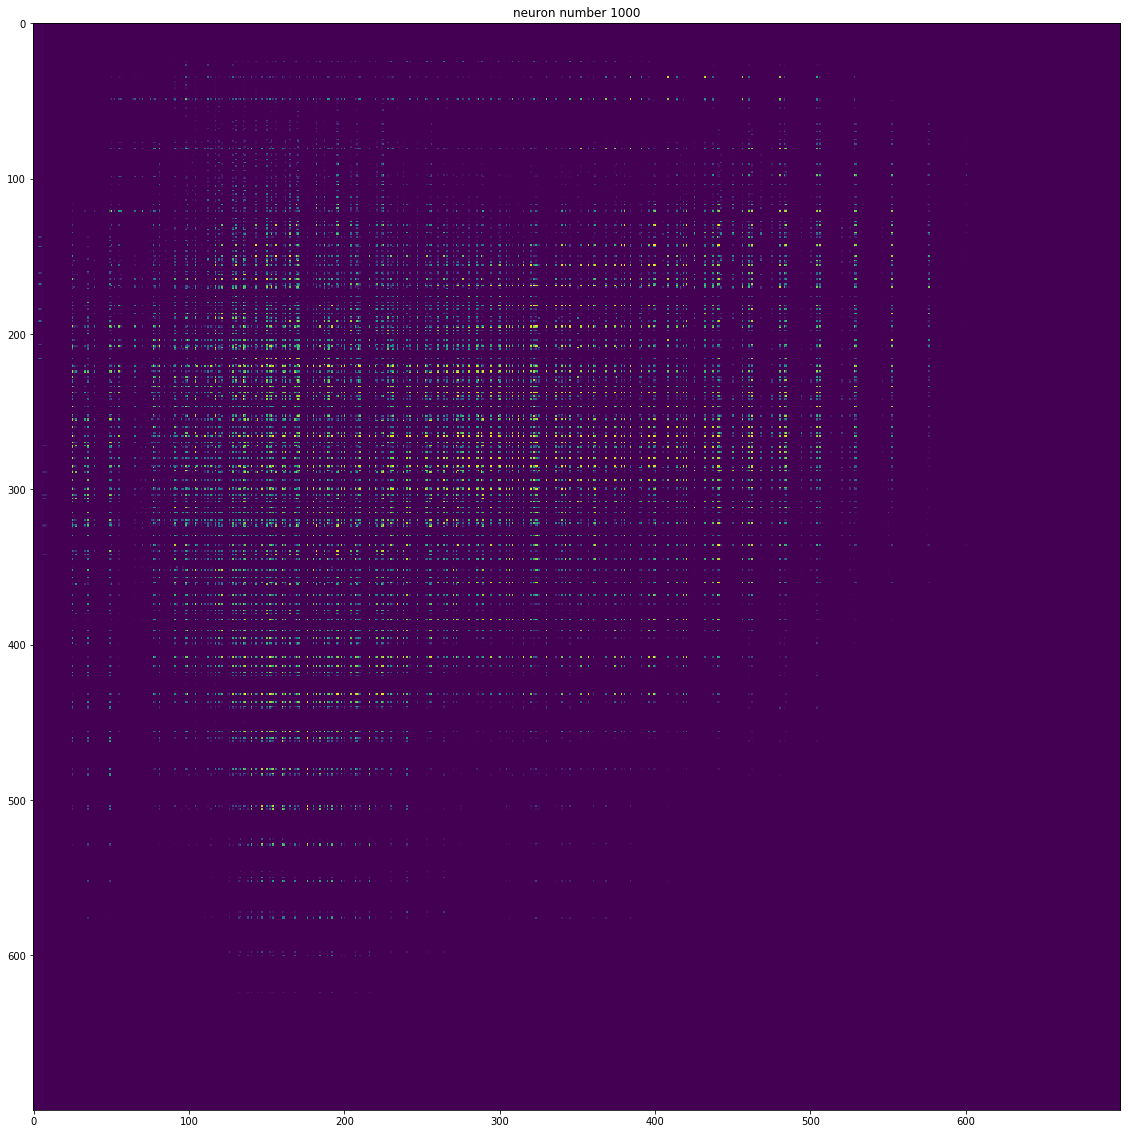

Epoch Number 40


In [2]:
#R=1 with random initial weights
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import random
def neighbors(x):
    if x == 0:
        return [x + 1, x + 25, x + 26]
    elif x == 600:
        return [x + 1, x - 25, x - 24]
    elif x == 624:
        return [x - 1, x - 25, x - 26]
    elif x == 25:
        return [x - 1, x + 25, x + 24]
    elif np.mod(x, 25) == 0:
        return [x + 1, x + 25, x - 25, x + 26, x - 24]
    elif np.mod(x, 25) == 24:
        return [x - 1, x + 25, x - 25, x + 24, x - 26]
    elif x < 25:
        return [x - 1, x + 1, x + 25, x + 24, x + 26]
    elif x > 600:
        return [x - 1, x + 1, x - 25, x - 26, x - 24]
    else:
        return [x - 1, x + 1, x - 24, x - 25, x - 26, x + 24, x + 25, x + 26]


# Loading Datasets and Initialization
alpha = 1
etha = 0.7


data_mnist = keras.datasets.mnist
(train_data_pre, train_labels), (test_data, test_labels) = data_mnist.load_data()
print(train_data_pre.shape)

# scale the values to 0.0 to 1.0
train_data_pre = train_data_pre / 255.0
test_data = test_data / 255.0

data = np.zeros((1000,28,28))
for i in range(1000):
    data_sample = random.choice(train_data_pre)
    for j in range(28):
        for f in range(28):
            data[i,j,f] = data_sample[j,f]
print("shape of data:", data.shape)

train_data = np.zeros([1000, 784])

for i in range(1000):
    train_data[i] = np.matrix.flatten(data[i])
    
weight = 0.5 * np.random.rand(train_data.shape[1], 625).astype("float")
epoch = 1
epoch_number = 50
numerator = np.zeros((625, 1))
# Normalizing the Data
for i in range(784):
    temp = np.copy(
        (train_data[:, i] - np.min(train_data[:, i])) / (np.max(train_data[:, i]) - np.min(train_data[:, i]) + 1e-50))
    train_data[:, i] = np.copy(temp)
np.random.shuffle(train_data)

print(f'train data : {np.shape(train_data)}')
print(f'train labels : {np.shape(train_labels)}')
print(f'weights : { np.shape(weight)}')

# Training the Network
while True:
    print("Epoch Number %d" % epoch)
    weight_prev = np.copy(weight)
    for i in range(train_data.shape[0]):
        temp = np.sum((weight - train_data[i, :].reshape(784, 1)) ** 2,
                      axis=0)
        argument = np.argmin(temp)
        weight[:, argument] += alpha * (
                    train_data[i, :].reshape(train_data[i, :].size, ) - weight[:, argument].reshape(weight.shape[0], ))
        neighbor = neighbors(argument)
        if (epoch < 10):
            for j in range(len(neighbor)):
                weight[:, neighbor[j]] += alpha * (
                            train_data[i, :].reshape(train_data[i, :].size, ) - weight[:, neighbor[j]].reshape(
                        weight.shape[0], ))
    epoch = epoch + 1
    alpha = alpha * etha
    if(epoch==5 or epoch==12 or epoch==20 or epoch==25 or epoch==30 or epoch== 35 or epoch==40 or epoch==50):
        f,a=plt.subplots(1,1)
        f.set_size_inches(50,20)
        shekl = np.zeros((700,700))
        for i1 in range(25):
            for j1 in range(25):
                for i2 in range(28):
                    for j2 in range(28):
                    
                        shekl[i1*i2,j1*j2]=weight[(28*j2)+i2,(25*i1)+j1]                        
        plt.imshow(shekl)
        plt.title(f'neuron number {i+1}')
        plt.show()
    if (np.linalg.norm(weight_prev - weight) < 0.0001):
        break
    if (epoch == epoch_number):
        break

# Finding the Wining Units and Plotting the Corresponding Weights
numerator2 = np.zeros((625, 10))
for i in range(train_data.shape[0]):
    temp = np.sum((weight - train_data[i, :].reshape(train_data[i, :].size, 1)) ** 2,
                  axis=0)
    argument = np.argmin(temp)
    numerator[argument] = numerator[argument] + 1
    numerator2[argument, train_labels[i]] = numerator2[argument, train_labels[i]] + 1
arguments = np.argsort(numerator,
                       axis=0)
numerator2_sorted = numerator2[np.reshape(arguments,(625,))]
numerator_sorted  = numerator[np.reshape(arguments,(625,))]
numerator2_sorted = np.flipud(numerator2_sorted)
numerator_sorted = np.flipud(numerator_sorted)
#for i in range(20):
#    plt.figure()
#    plt.imshow(weight[:, arguments[-1 - i]].reshape(28, 28))
#    plt.title(f'neuron number {i+1}')
#    plt.show()
#
#
# Creating a Table Containing the Number of Data Points in which each of the Wining Units have
#sorted_args = arguments[:: -1]
#lst = []
#lst.append("First")
#lst.append("Second")
#lst.append("Third")
#for i in range(20 - 3):
#    lst.append("%dth" % (i + 4))
#table = pd.DataFrame(numerator[sorted_args[:20]].reshape(1, 20),
#                     index=["Number of Points"],
#                     columns=lst)
#print(table)


In [3]:
from pandas import DataFrame
deff = numerator_sorted[0:20].reshape(20, 1)
df = DataFrame(deff, columns= ['Numbers'])
df.to_excel(r'out20.xlsx')

In [4]:
from pandas import DataFrame
df = DataFrame(numerator2_sorted, columns= ['1','2','3','4','5','6','7','8','9','10'])
df.to_excel(r'out.xlsx')

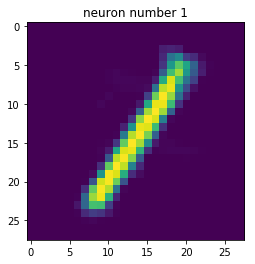

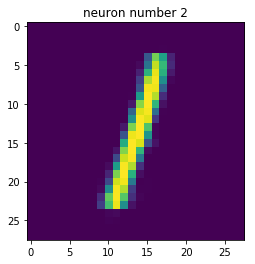

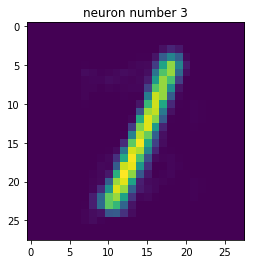

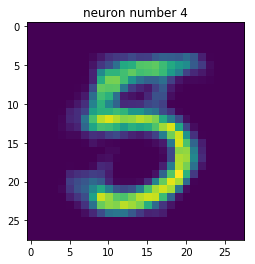

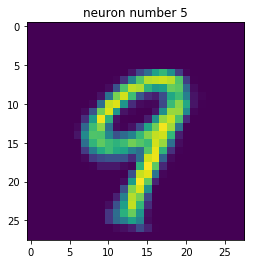

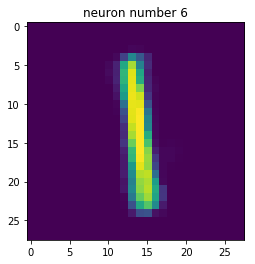

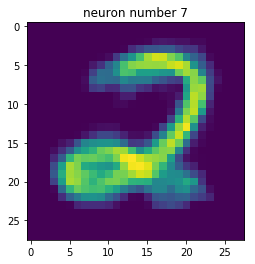

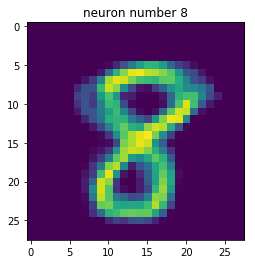

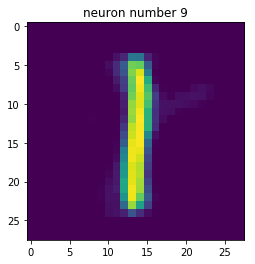

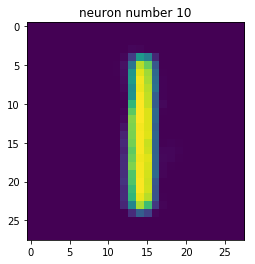

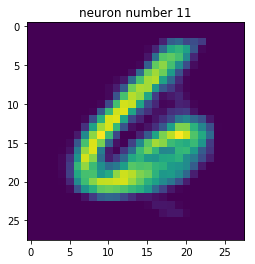

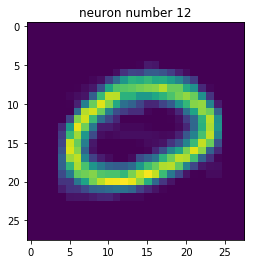

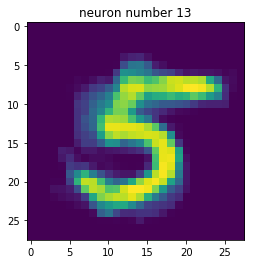

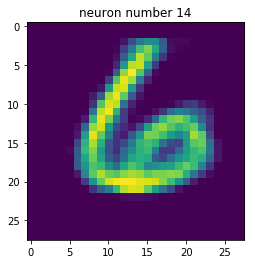

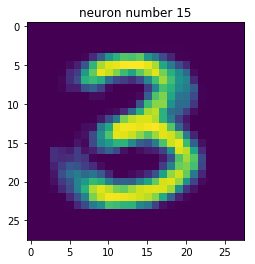

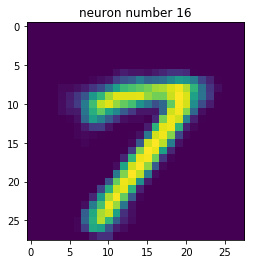

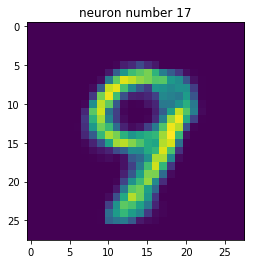

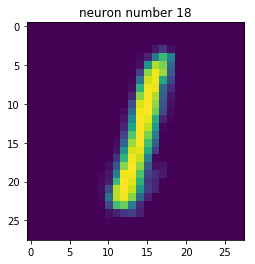

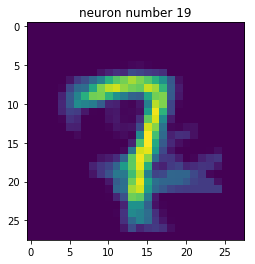

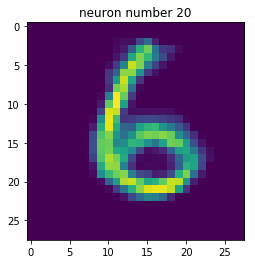

In [5]:
for i in range(20):
    plt.figure()
    plt.imshow(weight[:, arguments[-1 - i]].reshape(28, 28))
    plt.title(f'neuron number {i+1}')
    plt.show()

(60000, 28, 28)
shape of data: (1000, 28, 28)
train data : (1000, 784)
train labels : (60000,)
weights : (784, 625)
Epoch Number 1
Epoch Number 2
Epoch Number 3
Epoch Number 4


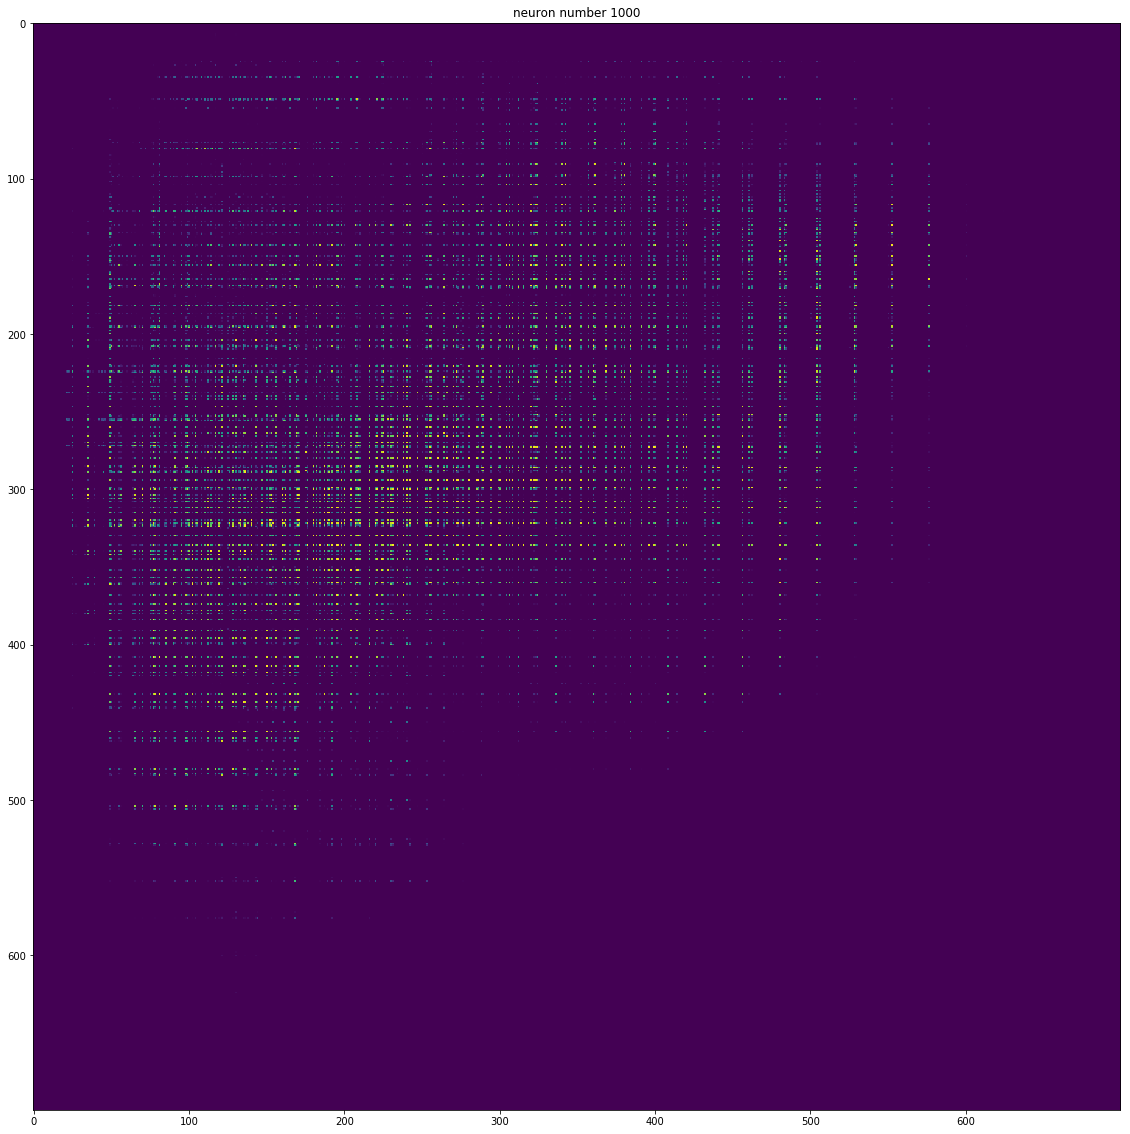

Epoch Number 5
Epoch Number 6
Epoch Number 7
Epoch Number 8
Epoch Number 9
Epoch Number 10
Epoch Number 11


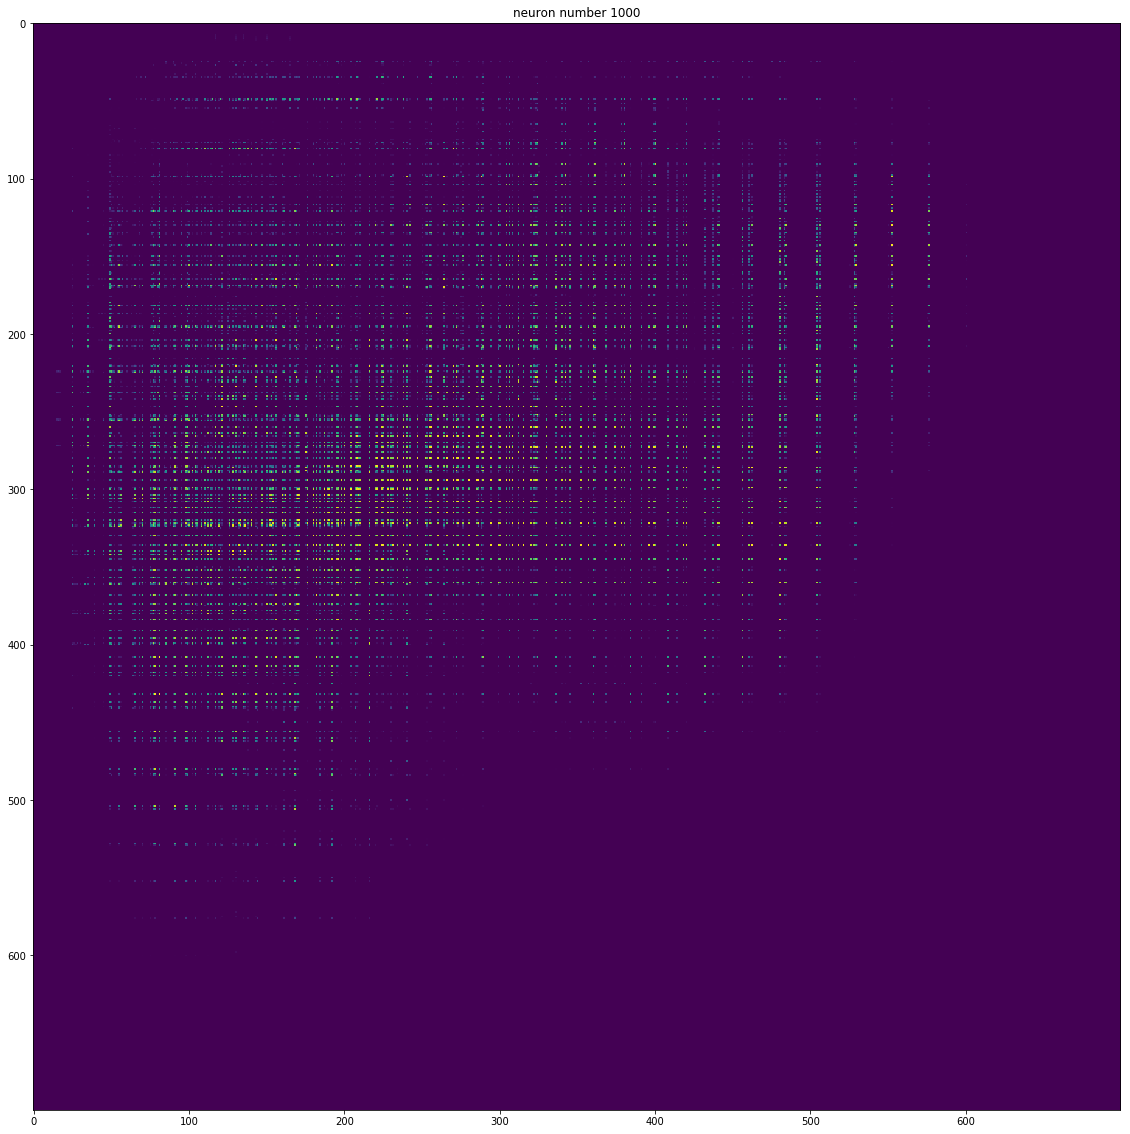

Epoch Number 12
Epoch Number 13
Epoch Number 14
Epoch Number 15
Epoch Number 16
Epoch Number 17
Epoch Number 18
Epoch Number 19


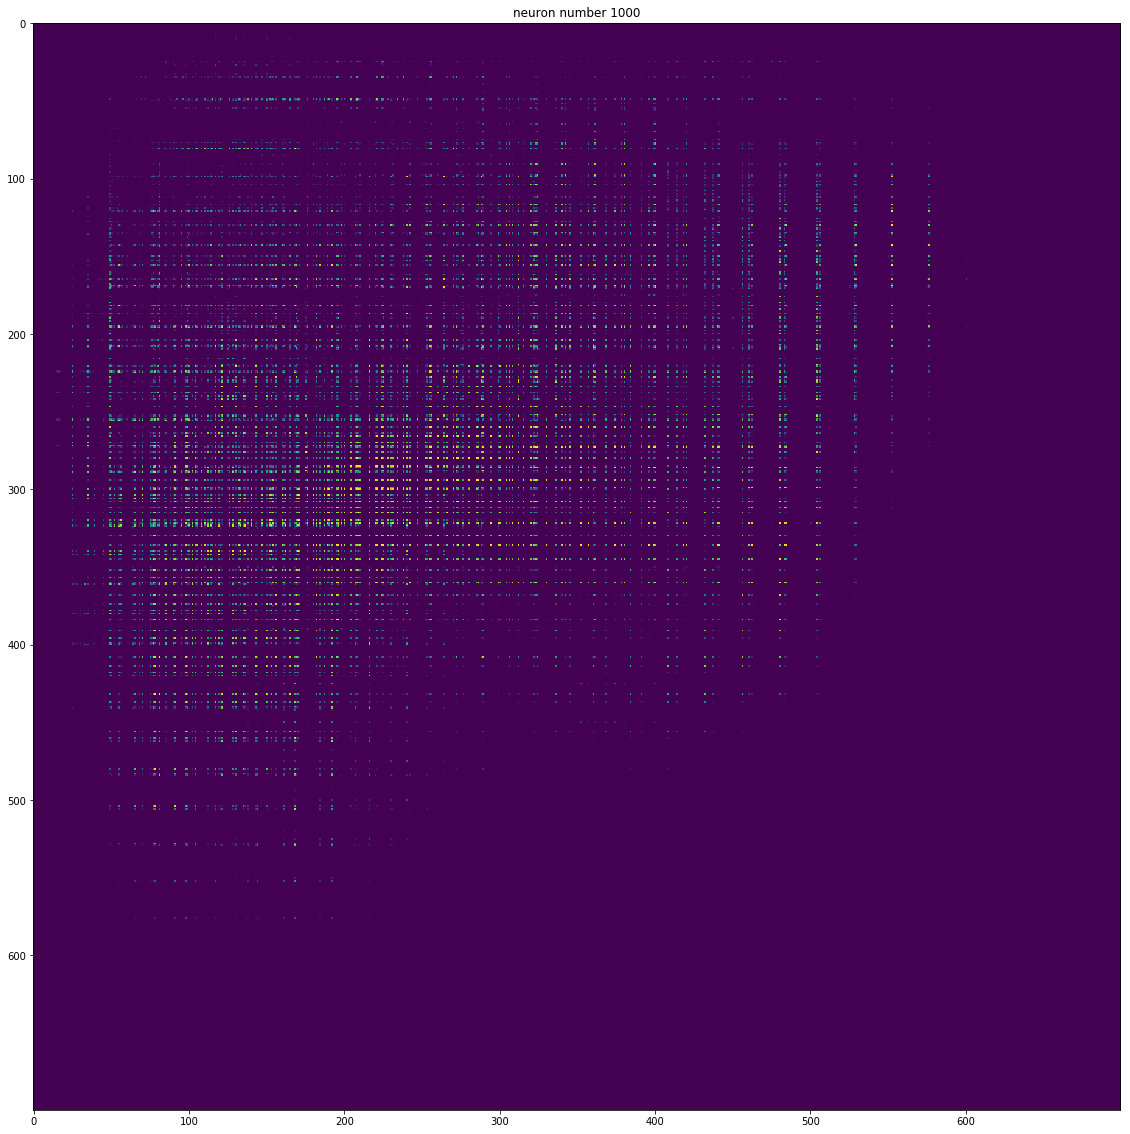

Epoch Number 20
Epoch Number 21
Epoch Number 22
Epoch Number 23
Epoch Number 24


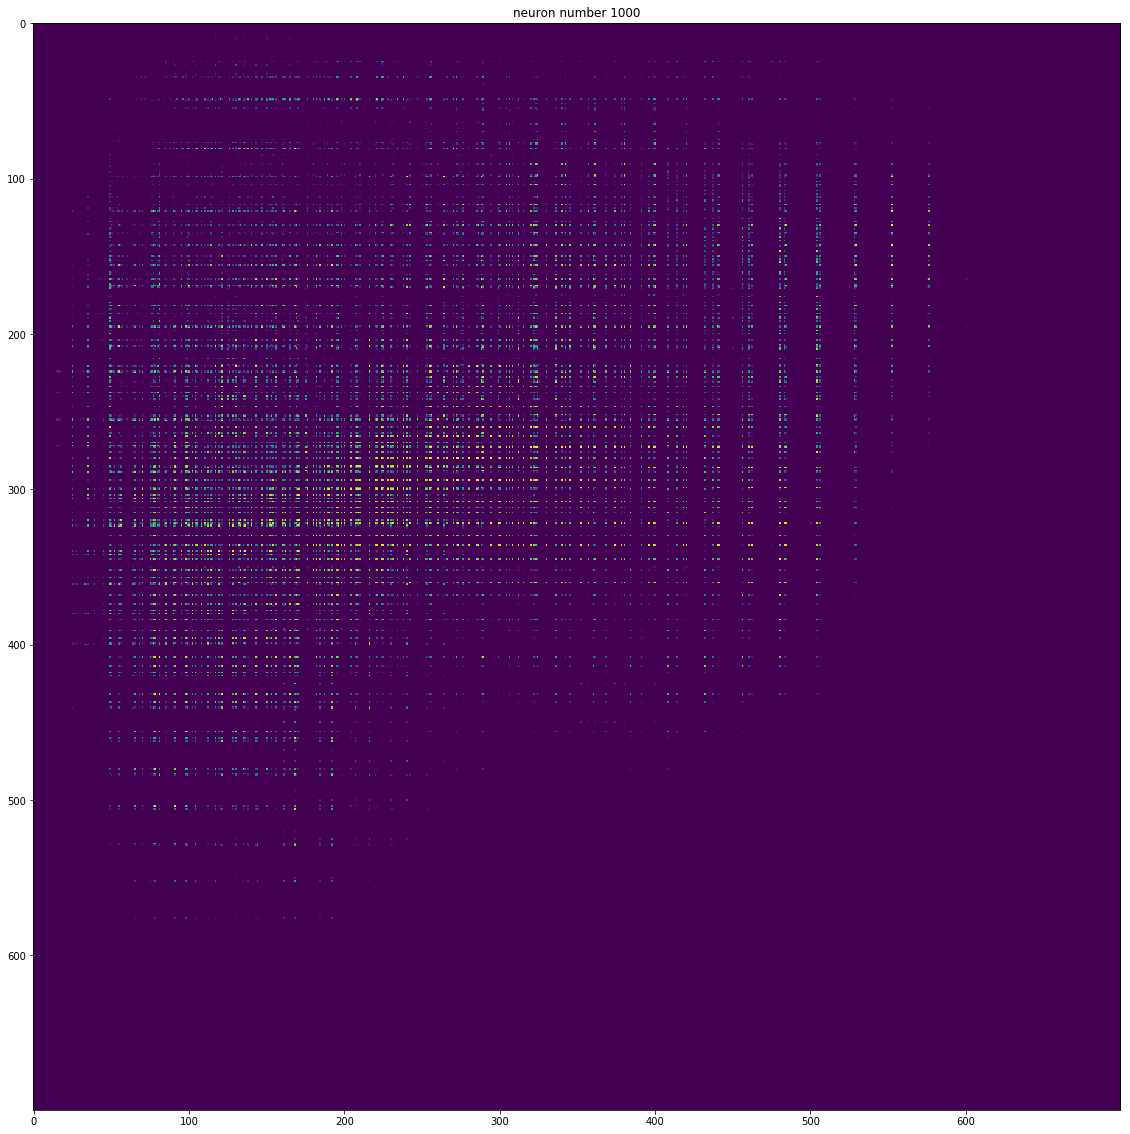

Epoch Number 25
Epoch Number 26
Epoch Number 27
Epoch Number 28
Epoch Number 29


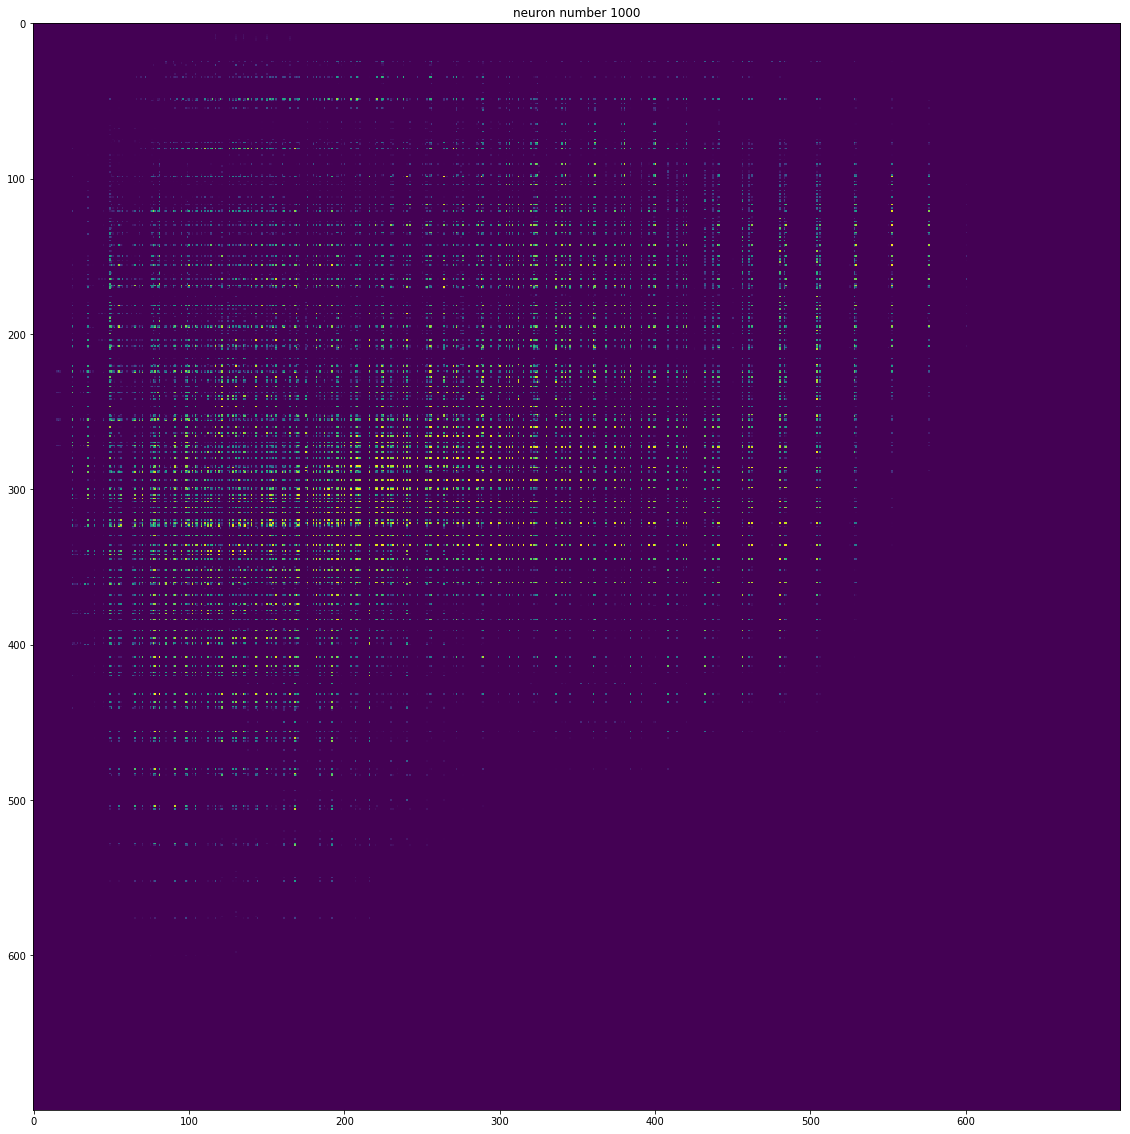

Epoch Number 30
Epoch Number 31
Epoch Number 32
Epoch Number 33
Epoch Number 34


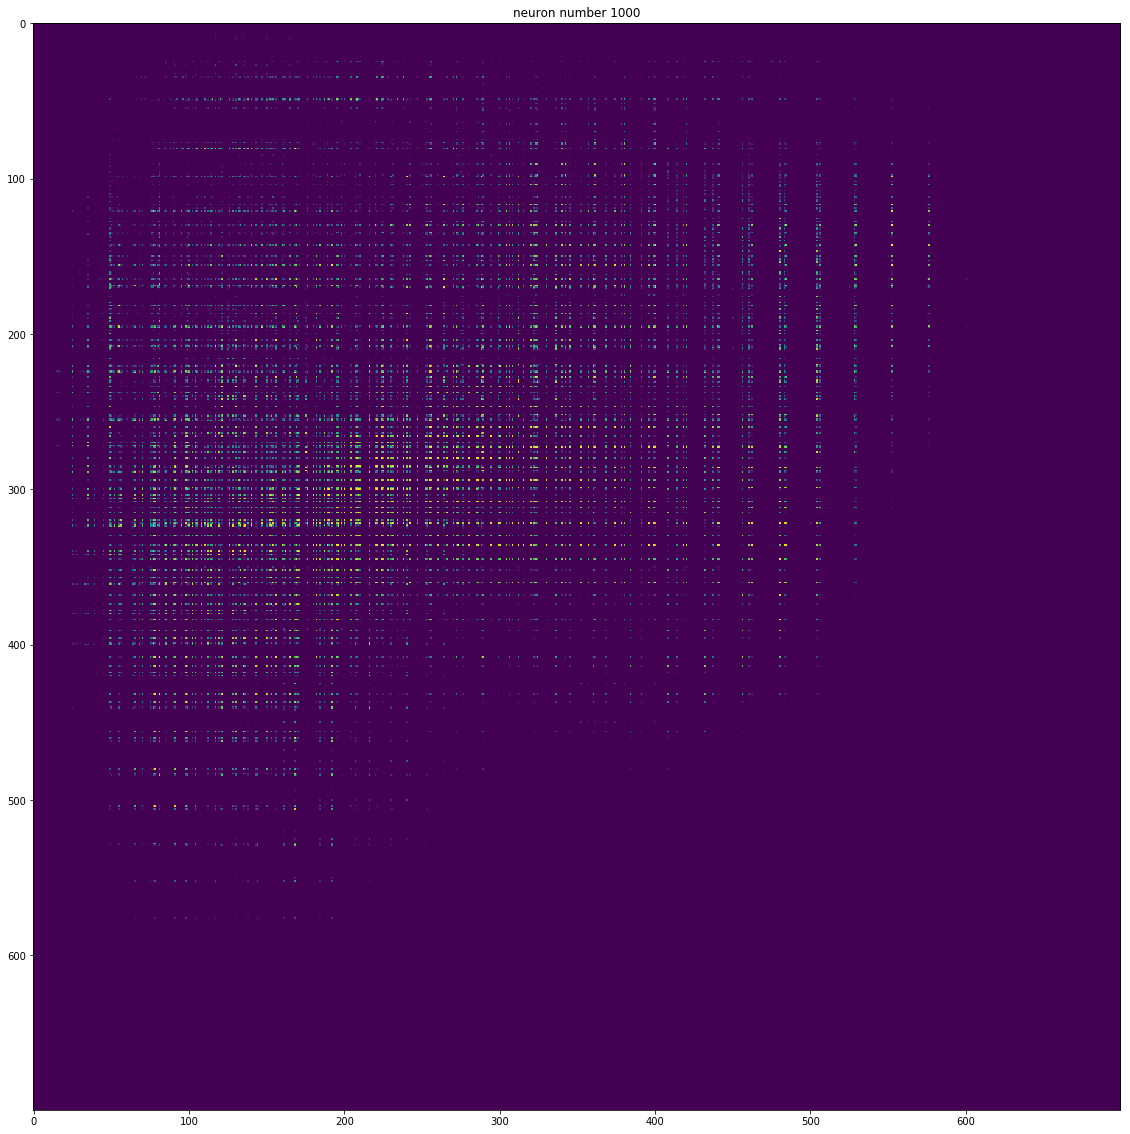

Epoch Number 35
Epoch Number 36
Epoch Number 37
Epoch Number 38
Epoch Number 39


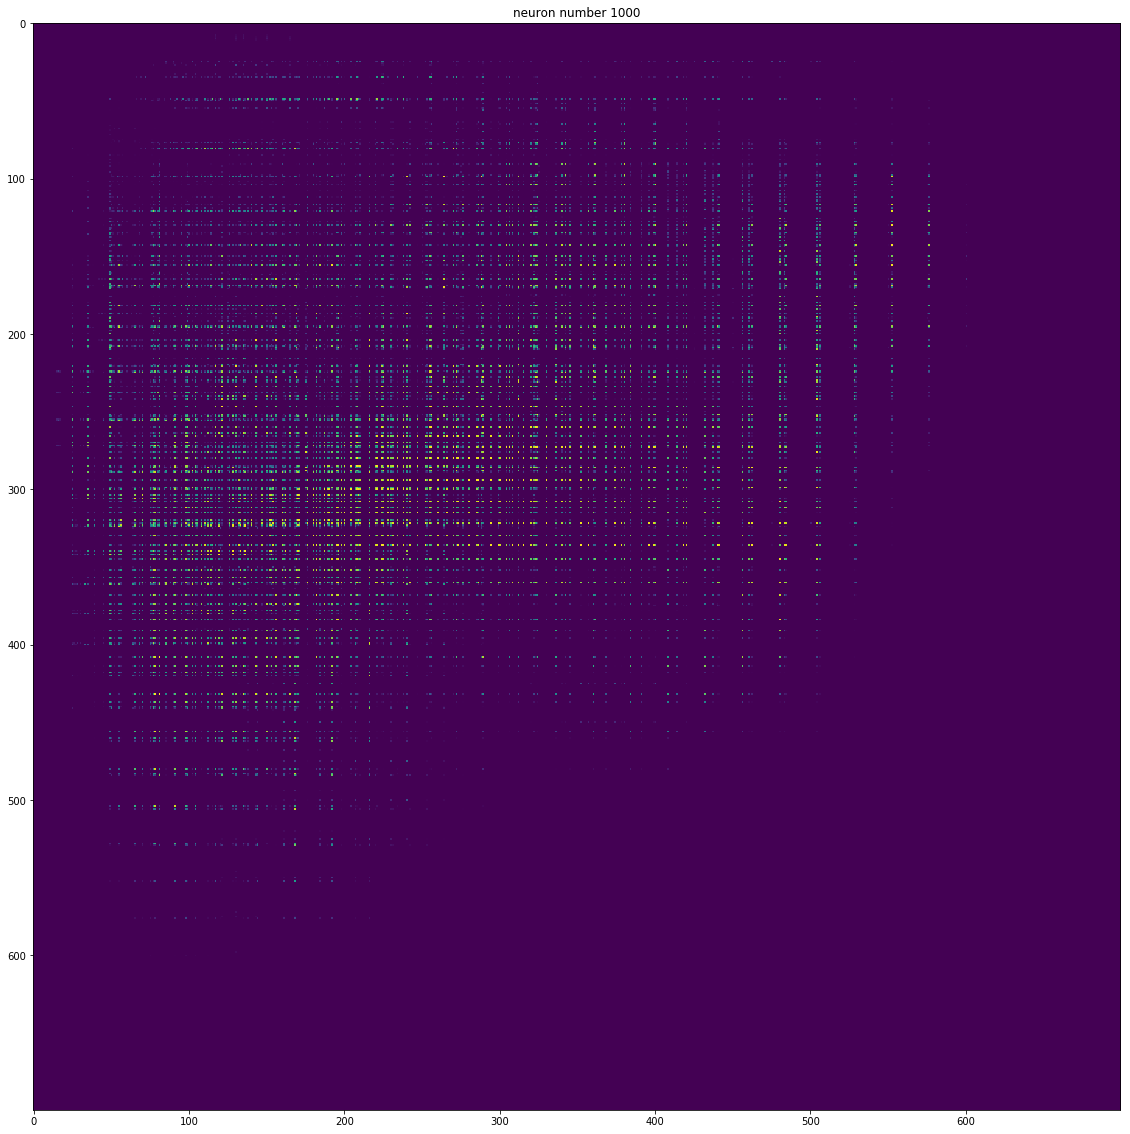

Epoch Number 40


In [6]:
#R=1 with random initial weights
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import random
def neighbors(x):
    if x == 0:
        return [x + 1, x + 25, x + 26]
    elif x == 600:
        return [x + 1, x - 25, x - 24]
    elif x == 624:
        return [x - 1, x - 25, x - 26]
    elif x == 25:
        return [x - 1, x + 25, x + 24]
    elif np.mod(x, 25) == 0:
        return [x + 1, x + 25, x - 25, x + 26, x - 24]
    elif np.mod(x, 25) == 24:
        return [x - 1, x + 25, x - 25, x + 24, x - 26]
    elif x < 25:
        return [x - 1, x + 1, x + 25, x + 24, x + 26]
    elif x > 600:
        return [x - 1, x + 1, x - 25, x - 26, x - 24]
    else:
        return [x - 1, x + 1, x - 24, x - 25, x - 26, x + 24, x + 25, x + 26]


# Loading Datasets and Initialization
alpha = 1
etha = 0.7


data_mnist = keras.datasets.mnist
(train_data_pre, train_labels), (test_data, test_labels) = data_mnist.load_data()
print(train_data_pre.shape)

# scale the values to 0.0 to 1.0
train_data_pre = train_data_pre / 255.0
test_data = test_data / 255.0

data = np.zeros((1000,28,28))
for i in range(1000):
    data_sample = random.choice(train_data_pre)
    for j in range(28):
        for f in range(28):
            data[i,j,f] = data_sample[j,f]
print("shape of data:", data.shape)

train_data = np.zeros([1000, 784])

for i in range(1000):
    train_data[i] = np.matrix.flatten(data[i])
    
weight = np.zeros((625,784))
for i in range(625):
    data_sample = random.choice(train_data_pre)
    weight[i]=data_sample.reshape(784)
weight = weight.T
epoch = 1
epoch_number = 50
numerator = np.zeros((625, 1))
# Normalizing the Data
for i in range(784):
    temp = np.copy(
        (train_data[:, i] - np.min(train_data[:, i])) / (np.max(train_data[:, i]) - np.min(train_data[:, i]) + 1e-50))
    train_data[:, i] = np.copy(temp)
np.random.shuffle(train_data)

print(f'train data : {np.shape(train_data)}')
print(f'train labels : {np.shape(train_labels)}')
print(f'weights : { np.shape(weight)}')

# Training the Network
while True:
    print("Epoch Number %d" % epoch)
    weight_prev = np.copy(weight)
    for i in range(train_data.shape[0]):
        temp = np.sum((weight - train_data[i, :].reshape(784, 1)) ** 2,
                      axis=0)
        argument = np.argmin(temp)
        weight[:, argument] += alpha * (
                    train_data[i, :].reshape(train_data[i, :].size, ) - weight[:, argument].reshape(weight.shape[0], ))
        neighbor = neighbors(argument)
        if (epoch < 10):
            for j in range(len(neighbor)):
                weight[:, neighbor[j]] += alpha * (
                            train_data[i, :].reshape(train_data[i, :].size, ) - weight[:, neighbor[j]].reshape(
                        weight.shape[0], ))
    epoch = epoch + 1
    alpha = alpha * etha
    if(epoch==5 or epoch==12 or epoch==20 or epoch==25 or epoch==30 or epoch== 35 or epoch==40 or epoch==50):
        f,a=plt.subplots(1,1)
        f.set_size_inches(50,20)
        shekl = np.zeros((700,700))
        for i1 in range(25):
            for j1 in range(25):
                for i2 in range(28):
                    for j2 in range(28):
                    
                        shekl[i1*i2,j1*j2]=weight[(28*j2)+i2,(25*i1)+j1]                        
        plt.imshow(shekl)
        plt.title(f'neuron number {i+1}')
        plt.show()
    if (np.linalg.norm(weight_prev - weight) < 0.0001):
        break
    if (epoch == epoch_number):
        break

# Finding the Wining Units and Plotting the Corresponding Weights
numerator2 = np.zeros((625, 10))
for i in range(train_data.shape[0]):
    temp = np.sum((weight - train_data[i, :].reshape(train_data[i, :].size, 1)) ** 2,
                  axis=0)
    argument = np.argmin(temp)
    numerator[argument] = numerator[argument] + 1
    numerator2[argument, train_labels[i]] = numerator2[argument, train_labels[i]] + 1
arguments = np.argsort(numerator,
                       axis=0)
numerator2_sorted = numerator2[np.reshape(arguments,(625,))]
numerator_sorted  = numerator[np.reshape(arguments,(625,))]
numerator2_sorted = np.flipud(numerator2_sorted)
numerator_sorted = np.flipud(numerator_sorted)
#for i in range(20):
#    plt.figure()
#    plt.imshow(weight[:, arguments[-1 - i]].reshape(28, 28))
#    plt.title(f'neuron number {i+1}')
#    plt.show()
#
#
# Creating a Table Containing the Number of Data Points in which each of the Wining Units have
#sorted_args = arguments[:: -1]
#lst = []
#lst.append("First")
#lst.append("Second")
#lst.append("Third")
#for i in range(20 - 3):
#    lst.append("%dth" % (i + 4))
#table = pd.DataFrame(numerator[sorted_args[:20]].reshape(1, 20),
#                     index=["Number of Points"],
#                     columns=lst)
#print(table)


In [7]:
from pandas import DataFrame
deff = numerator_sorted[0:20].reshape(20, 1)
df = DataFrame(deff, columns= ['Numbers'])
df.to_excel(r'out20.xlsx')

In [8]:
from pandas import DataFrame
df = DataFrame(numerator2_sorted, columns= ['1','2','3','4','5','6','7','8','9','10'])
df.to_excel(r'out.xlsx')

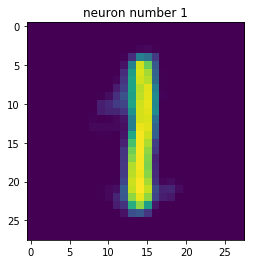

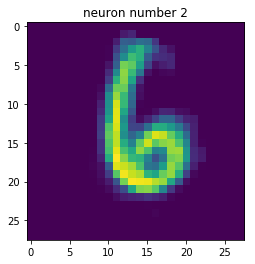

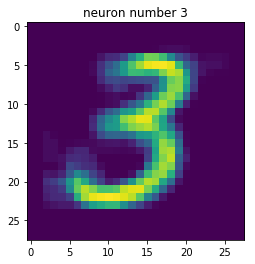

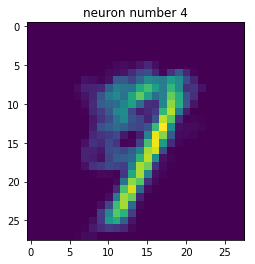

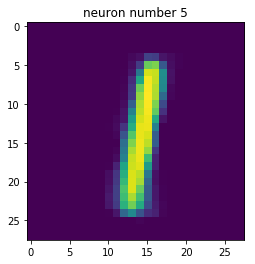

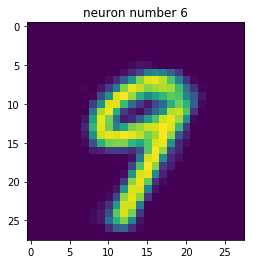

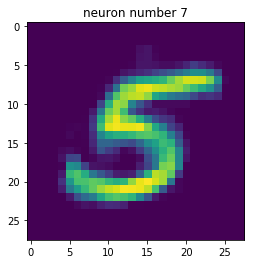

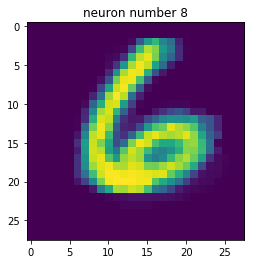

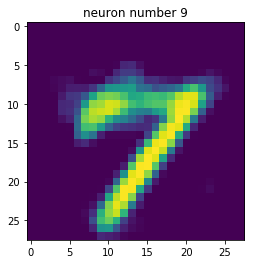

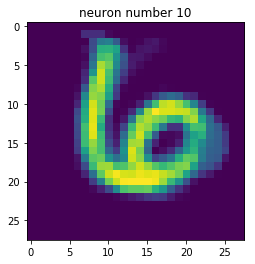

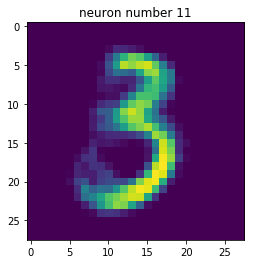

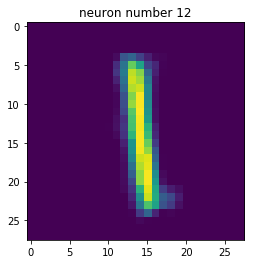

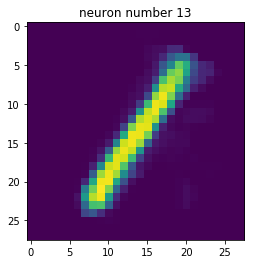

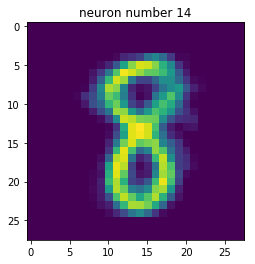

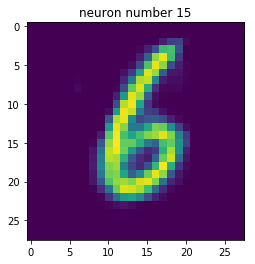

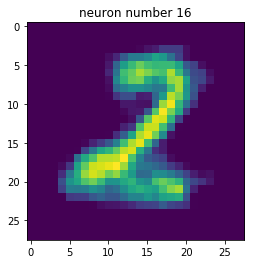

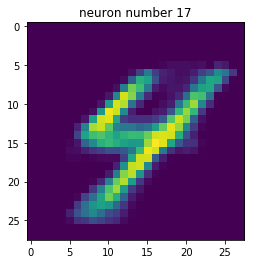

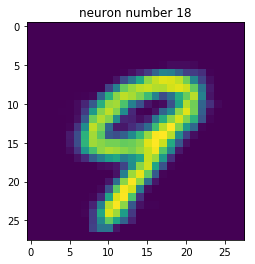

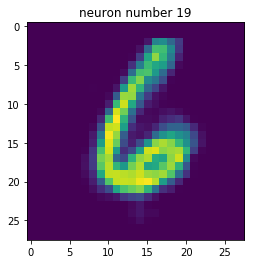

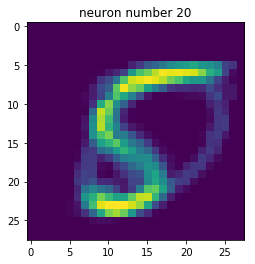

In [9]:
for i in range(20):
    plt.figure()
    plt.imshow(weight[:, arguments[-1 - i]].reshape(28, 28))
    plt.title(f'neuron number {i+1}')
    plt.show()